# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser
import seaborn as sns
from IPython.display import Image
import os

fil_path = "../data/srt/srt_csv/"
dir_list = os.listdir(fil_path)

''' Settings '''
sns.set_style("white")
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)
pd.set_option('display.precision', 3)

''' Load and concatinate CSV files into single dataframe'''

files=[]
for path in dir_list:
    files.append(
        pd.read_csv(fil_path+path,index_col=0)
    )
df_sub = pd.concat(files)

csv_names = ['../data/imdb_unique_prod-2018-04-21_0924.csv']
files = []
for path in csv_names:
    files.append(
        pd.read_csv(path,index_col=0)
    )
df_movies = pd.concat(files)
df_movies = df_movies.loc[:, ~df_movies.columns.str.contains('^Unnamed')]

### Remove unamed indicies

#cols = df_movies.columns.tolist()
#cols = cols[-2:] + cols[:-2]
#df_movies = df_movies[cols]

# Plotting (optional)

> Year Plot

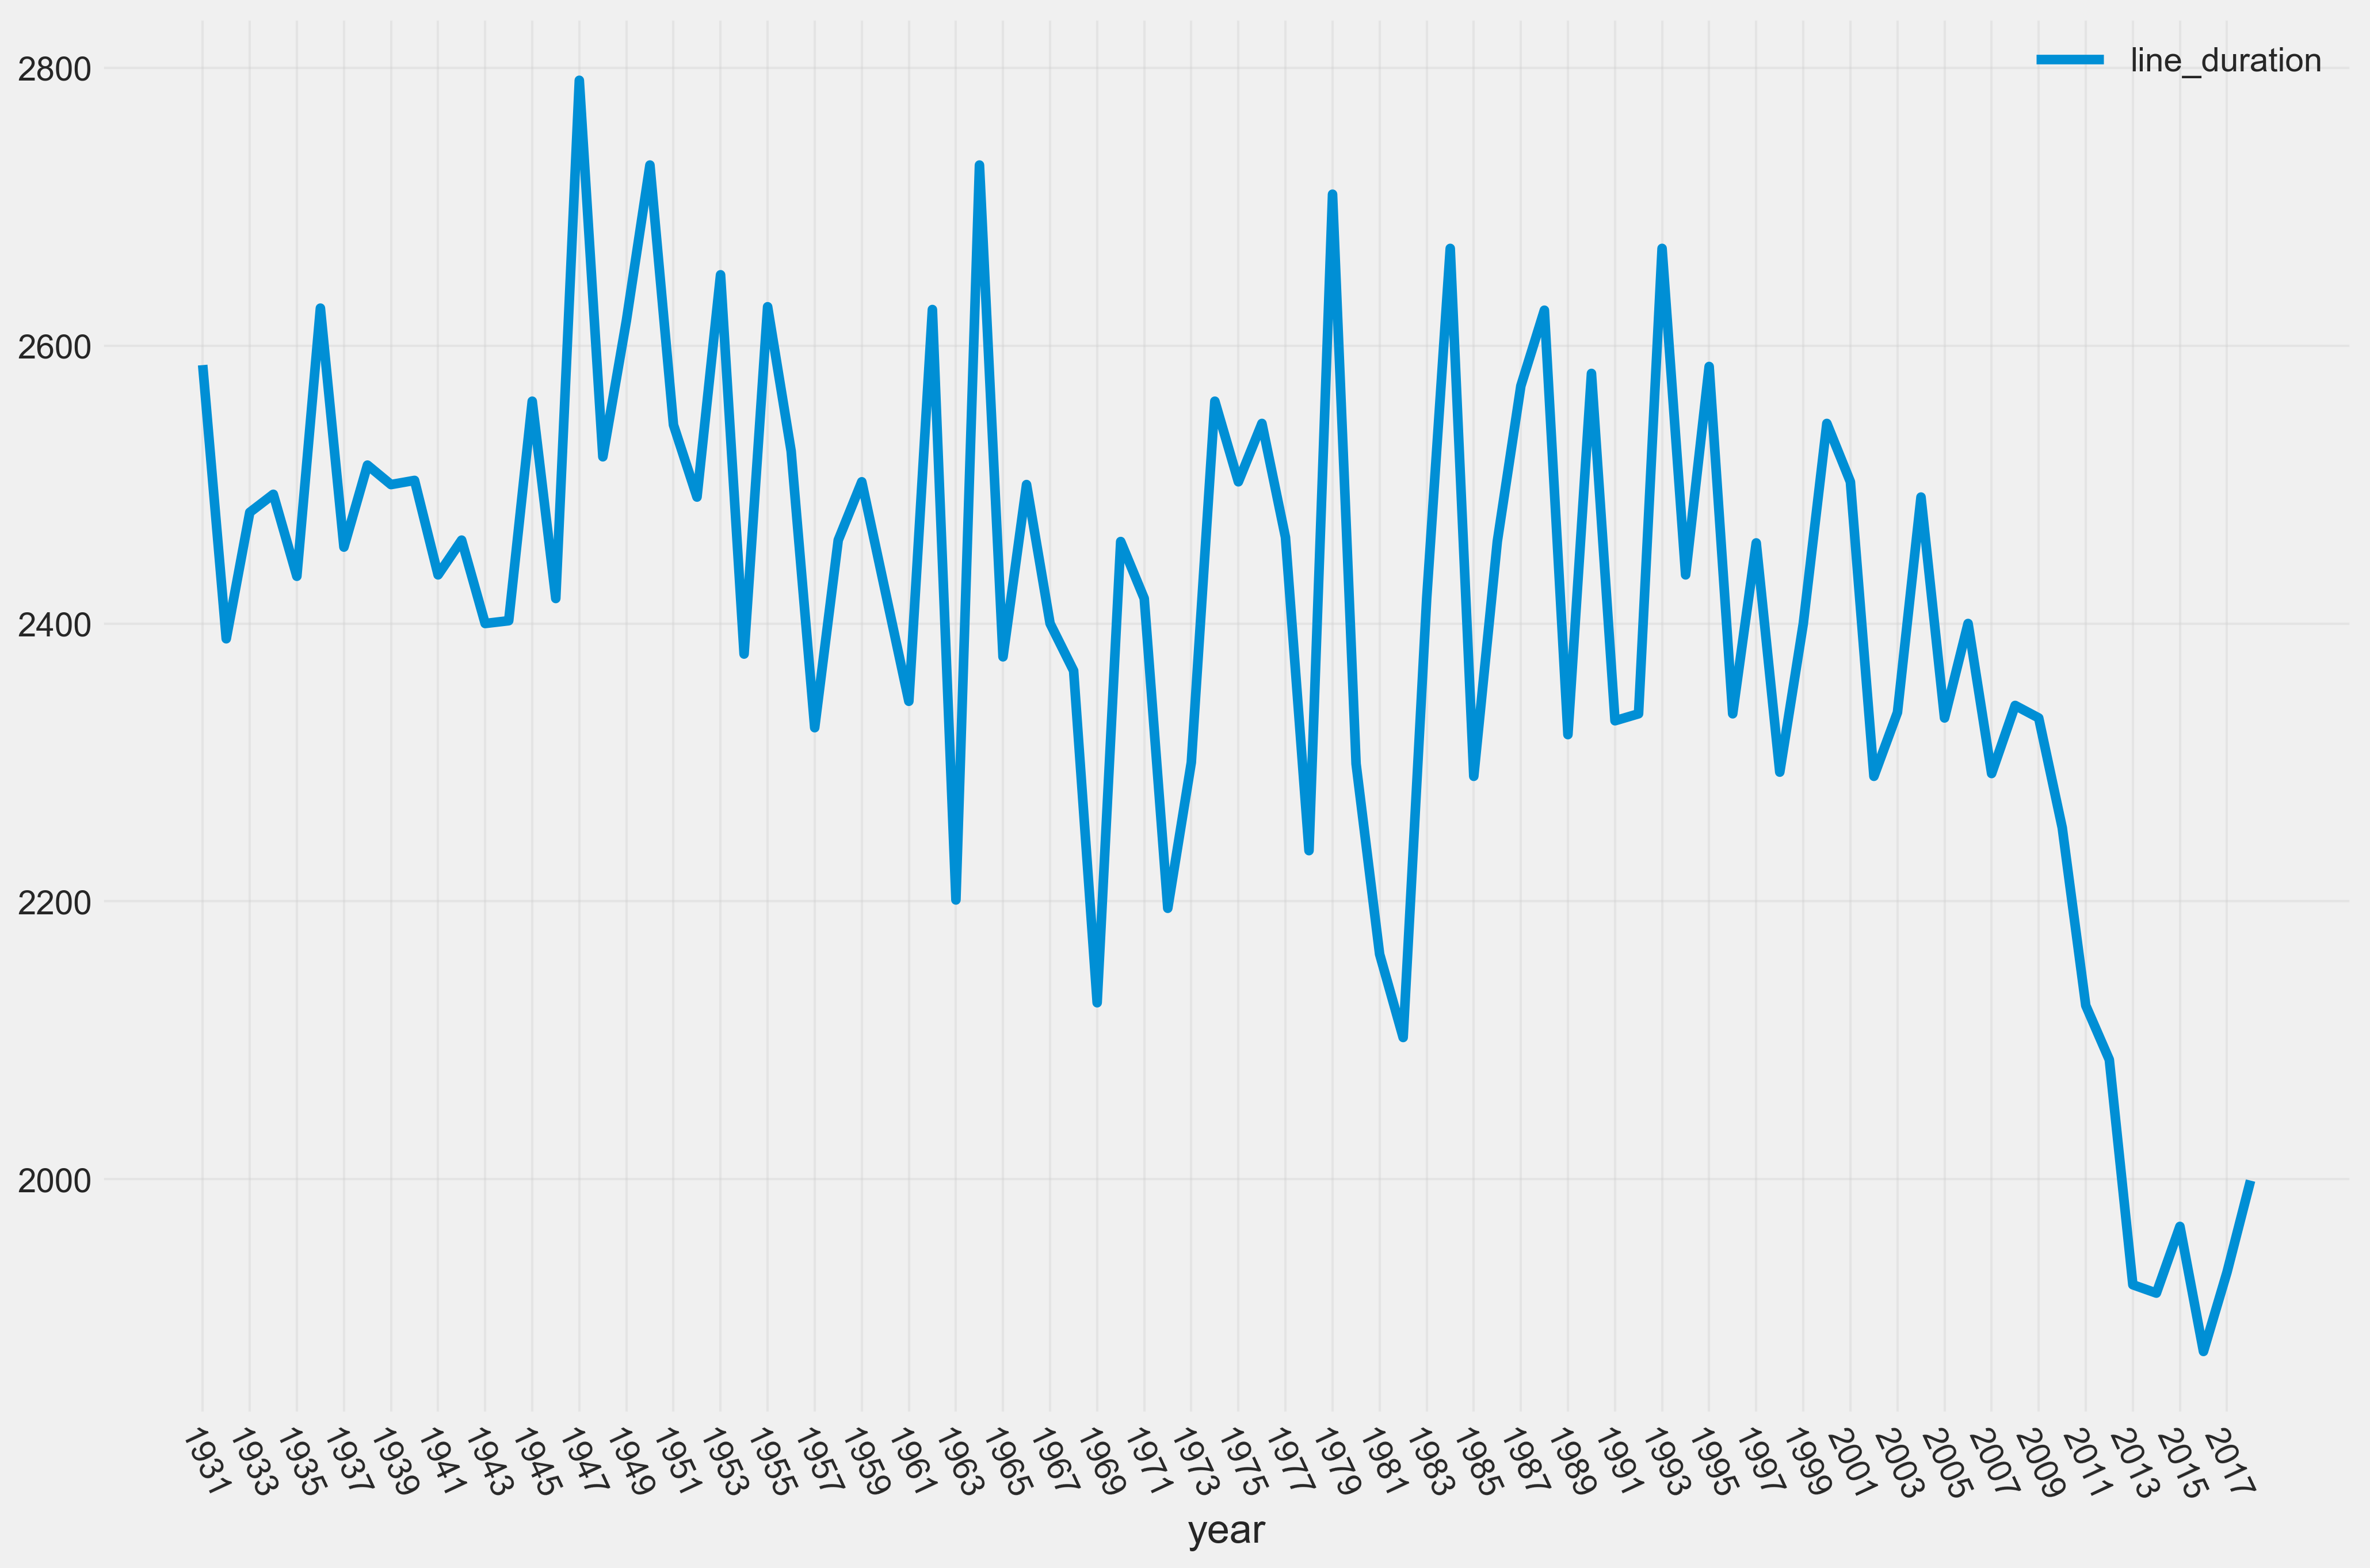

In [188]:
def plot_yearly_durations():
    plt.style.use('fivethirtyeight')
    df_sub['line_duration'] = df_sub['endTime'] - df_sub['startTime']
    df_sub['line_delta'] = df_sub['startTime'] - df_sub['endTime'].shift(1)
    df_sub['line_delta'] = df_sub['line_delta'].fillna(0).astype(int)
    #df_movies['genre'] = df_movies['genre'].dropna()
    df_submov = pd.merge(df_sub, df_movies, on='title')
    df_submov = df_submov[df_submov['year']>1930]
    df_submov_byyear = df_submov.groupby('year').agg(lambda x: x[x>0].median())
    #df_submov_byyear = df_submov.groupby('year').agg(lambda x: x[x>0].mean())
    df_submov_byyear = df_submov_byyear.reset_index()
    df_submov_byyear.plot(x='year',y='line_duration',figsize=(15,10),xticks=df_submov_byyear['year'][::2],rot=-65)
plot_yearly_durations()

In [181]:
gammas = sns.load_dataset("gammas")
gammas

timepoint  ROI  subject  BOLD signal
0           0.0  IPS        0        0.513
1           0.0  IPS        1       -0.414
2           0.0  IPS        2        0.215
3           0.0  IPS        3        0.815
4           0.0  IPS        4       -0.895
5           0.0  IPS        5       -0.074
6           0.0  IPS        6        3.543
7           0.0  IPS        7        0.080
8           0.0  IPS        8        1.547
9           0.0  IPS        9        2.827
...         ...  ...      ...          ...
5990       10.0   V1       10       -0.971
5991       10.0   V1       11        2.278
5992       10.0   V1       12        2.362
5993       10.0   V1       13       -0.956
5994       10.0   V1       14        1.730
5995       10.0   V1       15        0.069
5996       10.0   V1       16        0.827
5997       10.0   V1       17        1.363
5998       10.0   V1       18        0.571
5999       10.0   V1       19       -0.048

[6000 rows x 4 columns]

> TSPlot

    year  startTime    endTime  line_duration  line_delta  \
0   1931  2.507e+06  2.509e+06         2586.0       210.0   
1   1932  2.493e+06  2.496e+06         2389.0       210.0   
2   1933  2.359e+06  2.362e+06         2480.0       171.0   
3   1934  2.850e+06  2.854e+06         2493.0       100.0   
4   1935  2.836e+06  2.839e+06         2434.0       205.0   
5   1936  2.825e+06  2.829e+06         2627.0        84.0   
6   1937  2.946e+06  2.949e+06         2455.0       219.0   
7   1938  2.856e+06  2.859e+06         2514.0       173.0   
8   1939  3.147e+06  3.149e+06         2500.0       178.0   
9   1940  3.049e+06  3.052e+06         2503.0       172.0   
..   ...        ...        ...            ...         ...   
78  2009  3.104e+06  3.106e+06         2332.0       240.0   
79  2010  3.010e+06  3.013e+06         2253.0       252.0   
80  2011  2.998e+06  3.000e+06         2125.0       178.0   
81  2012  2.970e+06  2.972e+06         2086.0       294.0   
82  2013  3.208e+06  3.2

/Users/justinblinder/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


KeyError: "Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,\n            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,\n            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,\n            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,\n            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,\n            85, 86, 87],\n           dtype='int64') not in index"

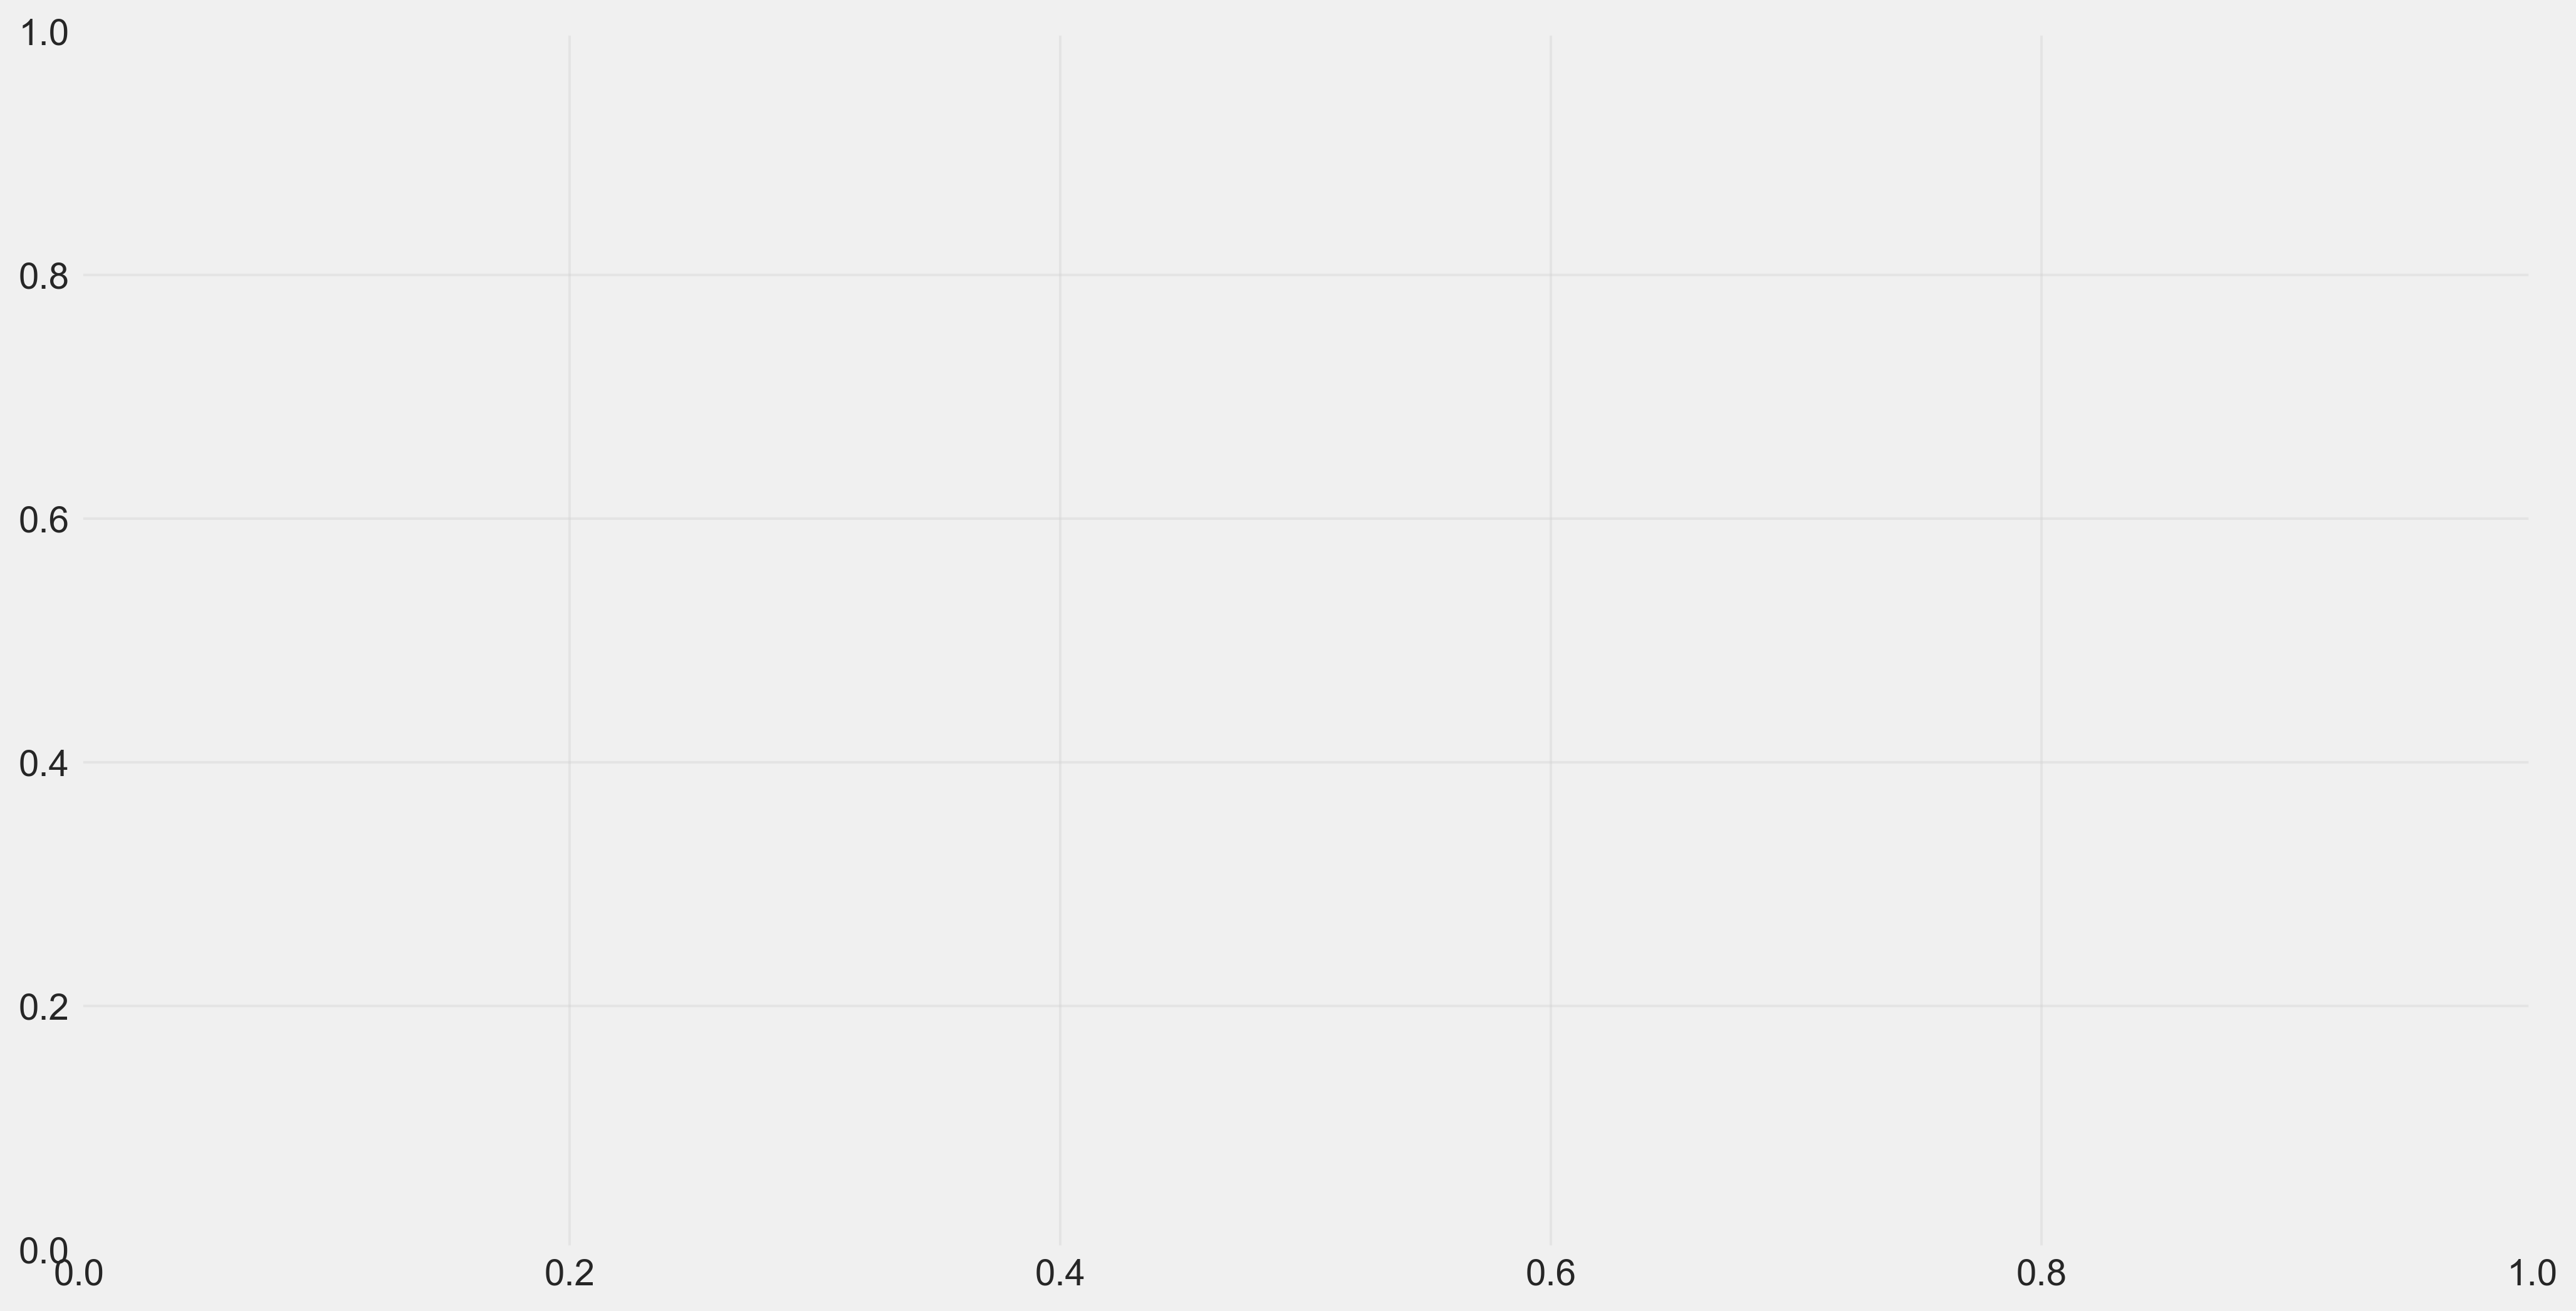

In [194]:
def plot_yearly_durations():
    plt.style.use('fivethirtyeight')
    df_sub['line_duration'] = df_sub['endTime'] - df_sub['startTime']
    df_sub['line_delta'] = df_sub['startTime'] - df_sub['endTime'].shift(1)
    df_sub['line_delta'] = df_sub['line_delta'].fillna(0).astype(int)
    #df_movies['genre'] = df_movies['genre'].dropna()
    df_submov = pd.merge(df_sub, df_movies, on='title')
    df_submov = df_submov[df_submov['year']>1930]

    df_submov_byyear = df_submov.groupby('year').agg(lambda x: x[x>0].median()).reset_index()
    #df_submov_byyear = df_submov.groupby('year').agg(lambda x: x[x>0].mean())

    print(df_submov_byyear)
    #df_submov_byyear.plot(x='year',y='line_duration',figsize=(15,10),xticks=df_submov_byyear['year'][::2],rot=-65)
    #ax = sns.tsplot(data=df_submov_byyear[['year','line_duration']],time="year",value="line_duration",unit=)
plot_yearly_durations()


In [95]:
from pylab import *
from IPython.display import Image
# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

## Plot yearly durations for documentation
def plot_genre_durations():
    plt.style.use('fivethirtyeight')
    df_sub['line_duration'] = df_sub['endTime'] - df_sub['startTime']
    df_sub['line_delta'] = df_sub['startTime'] - df_sub['endTime'].shift(1)
    df_sub['line_delta'] = df_sub['line_delta'].fillna(0).astype(int)
    #df_movies['genre'] = df_movies['genre'].dropna()
    df_submov_new = pd.merge(df_sub, df_movies, on='title')
    df_submov_new = df_submov_new[df_submov_new['year']>1930]
    df_submov_new['genre'] = df_submov_new['genre'].str.split(',').str[0]
    df_submov_bygenre = df_submov_new.groupby(['year','genre']).agg(lambda x: x[x>0].median())
    
    cols =  df_submov_bygenre.index.levels[1]
    df_submov_bygenre = df_submov_bygenre.reset_index()

    fig, ax = plt.subplots()
    index = np.arange(len(cols))
    charts = []
    bar()
    #figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    for g in cols:
        df_toplot = df_submov_bygenre[df_submov_bygenre['genre'].str.contains(g)]
        x = df_toplot["year"]; 
        y = df_toplot["line_duration"]
        c = ax.bar(x, y, label=g)
        charts.append(c)
    print(len(charts))
    #    legend()
    f, ((ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13)) = plt.subplots(1, len, sharex='col', sharey='row')
    for c in charts:
        c.plot()
    plt.tight_layout()
    plt.show()

    #xticks(range(0,len(x)), df_toplot["year"], rotation=90);
#plot_genre_durations()
plt.style.use('design60')
df_sub['line_duration'] = df_sub['endTime'] - df_sub['startTime']
df_sub['line_delta'] = df_sub['startTime'] - df_sub['endTime'].shift(1)
df_sub['line_delta'] = df_sub['line_delta'].fillna(0).astype(int)
#df_movies['genre'] = df_movies['genre'].dropna()
df_submov_new = pd.merge(df_sub, df_movies, on='title')
df_submov_new = df_submov_new[df_submov_new['year']>1930]
df_submov_new['genre'] = df_submov_new['genre'].str.split(',').str[0]
df_submov_bygenre = df_submov_new.groupby(['country']).agg(lambda x: x[x>0].mean())
df_submov_bygenre


startTime    endTime  line_duration  line_delta     budget  \
country                                                                    
Australia     3.089e+06  3.091e+06       2193.247    2669.065  5.503e+07   
Canada        3.119e+06  3.121e+06       2240.962    2817.713  5.345e+07   
China         3.177e+06  3.179e+06       2154.860    3788.089  1.979e+08   
Finland       2.631e+06  2.633e+06       2362.571    1167.974  7.300e+07   
France        2.946e+06  2.948e+06       2381.427    3537.456  8.312e+07   
Germany       3.322e+06  3.324e+06       2450.628    3126.912  7.490e+07   
Hong Kong     3.715e+06  3.717e+06       2407.154    2199.062  9.309e+07   
India         4.792e+06  4.794e+06       2455.371    2282.767  9.680e+06   
Ireland       3.351e+06  3.353e+06       1858.137    2176.606  1.300e+07   
Italy         3.655e+06  3.657e+06       1944.444    5075.145  4.986e+06   
Japan         2.867e+06  2.869e+06       1914.762    1961.635  8.521e+07   
Malta         3.824e+06  3.826e+06       1859.239    1662.304  5.000e+07   
Netherlands   3.052e+06  3.054e+06       1855.440    6671.412  1.000e+08   
New Zealand   5.333e+06  5.336e+06       2815.870    7280.284  9.947e+07   
South Africa  2.891e+06  2.893e+06       2274.280    2898.363  5.325e+07   
South Korea   3.234e+06  3.236e+06       2151.401    4461.582  3.000e+06   
Spain         2.610e+06  2.612e+06       1953.907    4768.487  7.602e+07   
UK            3.598e+06  3.601e+06       2424.861    3208.616  9.553e+07   
USA           3.275e+06  3.277e+06       2401.884    2344.270  7.761e+07   

              gross_usa  gross_usa_weekend  gross_worldwide  \
country                                                       
Australia     1.456e+08          3.369e+07        3.161e+08   
Canada        1.311e+08          4.092e+07        2.867e+08   
China         2.364e+08          9.390e+07        9.565e+08   
Finland       1.075e+08          3.816e+07        3.523e+08   
France        9.634e+07          2.601e+07        2.739e+08   
Germany       9.908e+07          2.088e+07        1.938e+08   
Hong Kong     2.079e+08          4.774e+07        4.059e+08   
India         9.333e+06          2.411e+06        1.899e+08   
Ireland       1.468e+07          1.336e+06        2.199e+07   
Italy         1.807e+07          4.129e+05        4.035e+07   
Japan         2.936e+08          7.680e+07        8.068e+08   
Malta         5.285e+07          1.600e+07        6.941e+07   
Netherlands   1.884e+08          5.051e+07        5.256e+08   
New Zealand   3.131e+08          6.565e+07        8.750e+08   
South Africa  1.202e+08          3.855e+07        2.097e+08   
South Korea   7.075e+05          6.896e+04        1.427e+07   
Spain         3.946e+07          1.578e+07        1.499e+08   
UK            1.628e+08          4.193e+07        4.975e+08   
USA           1.486e+08          3.598e+07        3.264e+08   

              imdb_critic_reviews_total  imdb_rating  metacritic_rating  \
country                                                                   
Australia                       307.717        7.461             76.458   
Canada                          271.701        6.745             68.798   
China                           386.855        6.972             64.609   
Finland                         175.000        6.300                NaN   
France                          296.953        6.731             61.569   
Germany                         254.691        6.880             70.066   
Hong Kong                       449.602        7.446             76.000   
India                            51.044        8.448                NaN   
Ireland                         457.000        8.200                NaN   
Italy                           409.000        8.000                NaN   
Japan                           378.337        7.094             69.976   
Malta                           232.000        7.300                NaN   
Netherlands                     602.000    

In [ ]:
## Plot yearly durations for documentation
def plot_yearly_durations():
    plt.style.use('fivethirtyeight')
    df_sub['line_duration'] = df_sub['endTime'] - df_sub['startTime']
    df_sub['line_delta'] = df_sub['startTime'] - df_sub['endTime'].shift(1)
    df_sub['line_delta'] = df_sub['line_delta'].fillna(0).astype(int)
    #df_sub['line_delta'] = -df_sub['line_delta']
    #df_movies['genre'] = df_movies['genre'].dropna()
    df_submov = pd.merge(df_sub, df_movies, on='title')
    df_submov = df_submov[df_submov['year']>1930]
    df_submov = df_submov[(df_submov['title']=="Vertigo") & (df_submov['line_duration']<6000) & (df_submov['line_duration']>0)&(df_submov['line_delta']>0) &(df_submov['line_delta']<6000)]
#    ax = df_submov[['startTime','line_duration']].plot(kind='bar', title ="V comp", figsize=(15, 10))
    #df_submov['line_duration'][::5].plot.bar(figsize=(15,10),rot=-65,width=2,xticks=df_submov['startTime'][::200],grid=False)
    df_submov['line_delta'][::5].plot.bar(figsize=(15,10),rot=-65,width=2,xticks=df_submov['startTime'][::200],grid=False)
    #df_submov['line_duration'].hist(bins=20)
    #print(df_submov['line_delta'])
plot_yearly_durations()


# Convert Currencies

In [2]:
from currency_converter import CurrencyConverter
from re import sub
import math

# Parse currencies

c = CurrencyConverter()
def parse_currency(value):
    value = str(value)
    currency_type = sub(r'[?!^\d.]', '', value ).replace(',','').rstrip()
    currency_amount = sub(r'[^\d.]', '', value)
    if currency_type == "$":
        currency_type = 'USD'
    if currency_type == "€":
        currency_type = 'EUR'
    if currency_type == "£":
        currency_type = 'GBP'
    if currency_type == "RUR":
        currency_type = 'USD'
    if currency_type == "FRF":
        currency_type = 'EUR'
    if currency_type == "DEM":
        currency_type = 'EUR'
    if currency_type == "":
        currency_type = 'USD'        
    return int(math.ceil(c.convert(currency_amount, currency_type, 'USD')))    

# Turn currency strings to floats

df_movies = df_movies[df_movies['gross_usa'].notnull()]
df_movies = df_movies[df_movies['gross_usa_weekend'].notnull()]
df_movies = df_movies[df_movies['gross_worldwide'].notnull()]
df_movies = df_movies[df_movies['budget'].notnull()]

#df_movies['gross_usa'] = df_movies['gross_usa'].apply(clean_imdb_box_office)
df_movies['budget'] = df_movies['budget'].apply(parse_currency)
df_movies['gross_usa'] = df_movies['gross_usa'].apply(parse_currency)
df_movies['gross_usa_weekend'] = df_movies['gross_usa_weekend'].apply(parse_currency)
df_movies['gross_worldwide'] = df_movies['gross_worldwide'].apply(parse_currency)

df_movies.head(5)

budget                                               cast  color  \
0    6000000  Marlon Brando,Al Pacino,James Caan,Richard S. ...  Color   
20  55000000  Marlon Brando,Gene Hackman,Christopher Reeve,N...  Color   
34   8724800  Ugo Tognazzi,Michel Serrault,Claire Maurier,Ré...  Color   
43  11000000  Tom Skerritt,Sigourney Weaver,Veronica Cartwri...  Color   
48  14000000  Roger Moore,Barbara Bach,Curd Jürgens,Richard ...  Color   

   country                                        description  \
0      USA  When the aging head of a famous crime family d...   
20     USA  Just before the destruction of the planet Kryp...   
34  France  Two gay men living in St. Tropez have their li...   
43      UK  In the distant future, the crew of the commerc...   
48      UK  James Bond is back again and his new mission i...   

                director                             genre  gross_usa  \
0   Francis Ford Coppola                      Crime, Drama  134966411   
20        Richard Donner  Action, Adventure, Drama, Sci-Fi  134218018   
34      Édouard Molinaro                            Comedy   20424259   
43          Ridley Scott                    Horror, Sci-Fi   78900000   
48         Lewis Gilbert       Action, Adventure, Thriller   46800000   

    gross_usa_weekend  gross_worldwide  imdb_critic_reviews_total  \
0              302393        245066411                      223.0   
20            7465343        166200000                      176.0   
34              18709         21400826                       31.0   
43            3527881        203630630                      424.0   
48            1347928        185400000                      111.0   

   imdb_popularity  imdb_rating imdb_ratings_total imdb_user_reviews_total  \
0              111          9.2          1,328,623                   2,707   
20           1,423          7.3            140,063                     517   
34             NaN          7.3              8,367                      41   
43             340          8.5            663,691                   1,233   
48           2,607          7.1             84,603                     289   

   language  metacritic_rating mpaa_rating  \
0   English              100.0           R   
20  English               86.0          PG   
34   French                NaN           R   
43  English               83.0           R   
48  English                NaN          PG   

                                         poster_image           production_co  \
0   https://ia.media-imdb.com/images/M/MV5BM2MyNjY...      Paramount Pictures   
20  https://ia.media-imdb.com/images/M/MV5BOWU0ZGE...          Dovemead Films   
34  https://ia.media-imdb.com/images/M/MV5BNzBiZTQ...        Da Ma Produzione   
43  https://ia.media-imdb.com/images/M/MV5BNDNhN2I...  Brandywine Productions   
48  https://ia.media-imdb.com/images/M/MV5BNDk3ODM...         Eon Productions   

              release_date  runtime                 title  year  
0      24 March 1972 (USA)    175.0         The Godfather  1972  
20  15 December 1978 (USA)    143.0              Superman  1978  
34     30 March 1979 (USA)     91.0    La Cage aux Folles  1978  
43      22 June 1979 (USA)    116.0                 Alien  1979  
48     3 August 1977 (USA)    125.0  The Spy Who Loved Me  1977

# Generate time columns

In [3]:
# Calculate length of line dialogue 

df_sub['line_duration'] = df_sub['endTime'] - df_sub['startTime']

# Calculate length of line dialogue
# (THIS LINE TOTALLY CHNAGES GRAPHS, IF SHIFT IS 1 vs -1)

df_sub['line_delta'] = df_sub['startTime'] - df_sub['endTime'].shift(1)
df_sub['line_delta'] = df_sub['line_delta'].fillna(0).astype(int)
#df_movies['genre'] = df_movies['genre'].dropna()



# Merge subtitle and movies

In [4]:
# Merge subtitle and movie dataframe
#df_submov = pd.merge(df_sub, df_movies[['title','year','genre','budget','imdb_rating','imdb_popularity','color','director','country','metacritic_rating','mpaa_rating','gross_usa','gross_usa_weekend','gross_worldwide']], on='title')
df_submov = pd.merge(df_sub, df_movies, on='title')
df_submov.head(5)


startTime endTime                             text                    title  \
0     99819  101480                    Good morning.  Beverly Hills Chihuahua   
1    102188  104179  Oh, hello who likes to see you.  Beverly Hills Chihuahua   
2    104690  105679               Oh, look there is.  Beverly Hills Chihuahua   
3    106192  107056                          Is she?  Beverly Hills Chihuahua   
4    108794  110091     Dude, if I would be nervous.  Beverly Hills Chihuahua   

  line_duration  line_delta    budget  \
0          1661           0  20000000   
1          1991         708  20000000   
2           989         511  20000000   
3           864         513  20000000   
4          1297        1738  20000000   

                                                cast  color country  \
0  Piper Perabo,Manolo Cardona,Jamie Lee Curtis,J...  Color     USA   
1  Piper Perabo,Manolo Cardona,Jamie Lee Curtis,J...  Color     USA   
2  Piper Perabo,Manolo Cardona,Jamie Lee Curtis,J...  Color     USA   
3  Piper Perabo,Manolo Cardona,Jamie Lee Curtis,J...  Color     USA   
4  Piper Perabo,Manolo Cardona,Jamie Lee Curtis,J...  Color     USA   

                                         description      director  \
0  Chloe, a diamond-clad ultra-pampered Beverly H...  Raja Gosnell   
1  Chloe, a diamond-clad ultra-pampered Beverly H...  Raja Gosnell   
2  Chloe, a diamond-clad ultra-pampered Beverly H...  Raja Gosnell   
3  Chloe, a diamond-clad ultra-pampered Beverly H...  Raja Gosnell   
4  Chloe, a diamond-clad ultra-pampered Beverly H...  Raja Gosnell   

                                       genre  gross_usa  gross_usa_weekend  \
0  Adventure, Comedy, Drama, Family, Romance   94514402           29300465   
1  Adventure, Comedy, Drama, Family, Romance   94514402           29300465   
2  Adventure, Comedy, Drama, Family, Romance   94514402           29300465   
3  Adventure, Comedy, Drama, Family, Romance   94514402           29300465   
4  Adventure, Comedy, Drama, Family, Romance   94514402           29300465   

   gross_worldwide  imdb_critic_reviews_total imdb_popularity  imdb_rating  \
0        149281606                       98.0             NaN          3.8   
1        149281606                       98.0             NaN          3.8   
2        149281606                       98.0             NaN          3.8   
3        149281606                       98.0             NaN          3.8   
4        149281606                       98.0             NaN          3.8   

  imdb_ratings_total imdb_user_reviews_total language  metacritic_rating  \
0             19,267                     103  English                NaN   
1             19,267                     103  English                NaN   
2             19,267                     103  English                NaN   
3             19,267                     103  English                NaN   
4             19,267                     103  English                NaN   

  mpaa_rating                                       poster_image  \
0          PG  https://ia.media-imdb.com/images/M/MV5BMTI2NzU...   
1          PG  https://ia.media-imdb.com/images/M/MV5BMTI2NzU...   
2          PG  https://ia.media-imdb.com/images/M/MV5BMTI2NzU...   
3          PG  https://ia.media-imdb.com/images/M/MV5BMTI2NzU...   
4          PG  https://ia.media-imdb.com/images/M/MV5BMTI2NzU...   

      production_co          release_date  runtime  year  
0  Mandeville Films  3 October 2008 (USA)     91.0  2008  
1  Mandeville Films  3 October 2008 (USA)     91.0  2008  
2  Mandeville Films  3 October 2008 (USA)     91.0  2008  
3  Mandeville Films  3 October 2008 (USA)     91.0  2008  
4  Mandeville Films  3 October 2008 (USA)     91.0  2008

### Parse and merge categoricals (genre)

>TODO: Make sure this join is correct
Seems good :)

In [5]:
import patsy
# Categorize genres
x = df_submov['genre'].str.split('\s*,\s*', expand=True).stack()
df_new = pd.crosstab(x.index.get_level_values(0), x.values).iloc[:, 1:]
df_submov = df_submov.join(df_new)

# Categorize mpaaa
x = df_submov['mpaa_rating'].str.split('\s*,\s*', expand=True).stack()
df_new = pd.crosstab(x.index.get_level_values(0), x.values).iloc[:, 1:]
df_submov = df_submov.join(df_new)

# Categorize color
x = df_submov['color'].str.split('\s*,\s*', expand=True).stack()
df_new = pd.crosstab(x.index.get_level_values(0), x.values).iloc[:, 1:]
df_submov = df_submov.join(df_new)

x = df_submov['country'].str.split('\s*,\s*', expand=True).stack()
df_new = pd.crosstab(x.index.get_level_values(0), x.values).iloc[:, 1:]
df_submov = df_submov.join(df_new)

x = df_submov['language'].str.split('\s*,\s*', expand=True).stack()
df_new = pd.crosstab(x.index.get_level_values(0), x.values).iloc[:, 1:]
df_submov = df_submov.join(df_new)





''' patsy handles the dummy variable trap'''
#df_submov['genre'] = df_submov['genre'].str.split(',').str[0]
#X=patsy.dmatrix('genre',data=df_submov,return_type='dataframe')
#df_submov.join(X).groupby('title').mean()

' patsy handles the dummy variable trap'

#### Pickle 

In [14]:
df_submov.to_pickle('../data/df_submove-2018-04-25-0322.pkl')

# UNPICKLE ME
![](https://media.giphy.com/media/sIIhZliB2McAo/giphy.gif)

In [18]:
df_submov = pd.read_pickle('../data/df_submove-2018-04-25-0322.pkl')

# Plot (optional)

In [19]:
'''TODO: Figure out why the line_duration is missing here. The work on the seaborn plot.'''

df_groupbytitle = df_submov.groupby('title').mean()
#df_groupbytitle = df_submov.groupby('title').mean().reset_index()
#df_groupbytitle
#sns.tsplot(data=df_groupbytitle,time='year',value='line_duration')

# Groupby

In [6]:
# Group by title

df_submov_bytitle = df_submov.groupby('title').agg(lambda x: x[x>0].mean())

df_submov_bytitle = df_submov_bytitle[df_submov_bytitle.columns.difference(['startTime','endTime'])]
df_submov_bytitle = df_submov_bytitle.fillna(0)

df_submov_bytitle.head(5)

Adventure  Animation  Biography  Canada  China  Color  \
title                                                                     
101 Dalmatians          1.0        0.0        0.0     0.0    0.0    1.0   
12 Years a Slave        0.0        0.0        1.0     0.0    0.0    1.0   
13 Hours                0.0        0.0        0.0     0.0    0.0    1.0   
2 Fast 2 Furious        0.0        0.0        0.0     0.0    0.0    1.0   
2 Guns                  0.0        0.0        0.0     0.0    0.0    1.0   

                  Comedy  Crime  Drama  Family  Fantasy  Film-Noir  Finland  \
title                                                                         
101 Dalmatians       1.0    1.0    0.0     1.0      0.0        0.0      0.0   
12 Years a Slave     0.0    0.0    1.0     0.0      0.0        0.0      0.0   
13 Hours             0.0    0.0    1.0     0.0      0.0        0.0      0.0   
2 Fast 2 Furious     0.0    1.0    0.0     0.0      0.0        0.0      0.0   
2 Guns               1.0    1.0    0.0     0.0      0.0        0.0      0.0   

                  France  French  Germany  Hindi  History  Hong Kong  Horror  \
title                                                                          
101 Dalmatians       0.0     0.0      0.0    0.0      0.0        0.0     0.0   
12 Years a Slave     0.0     0.0      0.0    0.0      1.0        0.0     0.0   
13 Hours             0.0     0.0      0.0    0.0      1.0        0.0     0.0   
2 Fast 2 Furious     0.0     0.0      0.0    0.0      0.0        0.0     0.0   
2 Guns               0.0     0.0      0.0    0.0      0.0        0.0     0.0   

                  India  Ireland  Italy  Japan  Korean  ...   PG-13    R  \
title                                                   ...                
101 Dalmatians      0.0      0.0    0.0    0.0     0.0  ...     0.0  0.0   
12 Years a Slave    0.0      0.0    0.0    0.0     0.0  ...     0.0  1.0   
13 Hours            0.0      0.0    0.0    0.0     0.0  ...     0.0  1.0   
2 Fast 2 Furious    0.0      0.0    0.0    0.0     0.0  ...     1.0  0.0   
2 Guns              0.0      0.0    0.0    0.0     0.0  ...     0.0  1.0   

                  Romance  Sci-Fi  South Africa  South Korea  Spain  Sport  \
title                                                                        
101 Dalmatians        0.0     0.0           0.0          0.0    0.0    0.0   
12 Years a Slave      0.0     0.0           0.0          0.0    0.0    0.0   
13 Hours              0.0     0.0           0.0          0.0    0.0    0.0   
2 Fast 2 Furious      0.0     0.0           0.0          0.0    0.0    0.0   
2 Guns                0.0     0.0           0.0          0.0    0.0    0.0   

                  Swahili  Thriller   UK  USA  War  Western    budget  \
title                                                                   
101 Dalmatians        0.0       0.0  0.0  1.0  0.0      0.0  75000000   
12 Years a Slave      0.0       0.0  0.0  1.0  0.0      0.0  20000000   
13 Hours              0.0       1.0  0.0  0.0  1.0      0.0  50000000   
2 Fast 2 Furious      0.0       1.0  0.0  1.0  0.0      0.0  76000000   
2 Guns                0.0       1.0  0.0  1.0  0.0      0.0  61000000   

                  gross_usa  gross_usa_weekend  gross_worldwide  \
title                                                             
101 Dalmatians    136189294           45073479        320689294   
12 Years a Slave   56671993             923715        187733202   
13 Hours           52853219           16000000         69411370   
2 Fast 2 Furious  127154901           50472480        107376378   
2 Guns             75612460           27059130        131940411   

                  imdb_critic_reviews_total  imdb_rating  line_delta  \
title                                                                  
101 Dalmatians                         56.0          5.7    4178.950   
12 Years a Slave                      601.0          8.1    3266.731   
13 Hours                   

# Plot MVP (optional)

In [ ]:
# Plot for MVP
df_submov_byyear = df_submov.groupby('year').agg(lambda x: x[x>0].mean())
df_submov_byyear = df_submov_byyear.reset_index()
df_submov_byyear.plot(x='year',y='line_duration')

# Plot scatter

In [ ]:
# Filter outliers
df_submov_bytitle = df_submov_bytitle[(df_submov_bytitle['line_duration'] < 10000) & (df_submov_bytitle['line_delta'] < 10000) ]

In [ ]:
from matplotlib import rcParams
import seaborn as sns

plt.style.use('fivethirtyeight')

sns.set(rc={'figure.figsize':(11.7,8.27)})
rcParams['figure.figsize'] = 11.7,8.27
#df_test = df_test[(df_test['budget'] < 500000000) & (df_test['gross_usa'] < 4000000000) & (df_test['gross_usa_weekend'] < 500000000) & (df_test['gross_worldwide'] < 100000000) & (df_test['imdb_rating'] < 8)]

sns.lmplot(x='budget',y='line_duration',data=df_submov_bytitle,fit_reg=True) 
sns.lmplot(x='budget',y='line_delta',data=df_submov_bytitle,fit_reg=True) 


sns.lmplot(x='gross_usa',y='line_duration',data=df_submov_bytitle,fit_reg=True) 
sns.lmplot(x='gross_usa',y='line_delta',data=df_submov_bytitle,fit_reg=True) 


sns.lmplot(x='gross_usa_weekend',y='line_duration',data=df_submov_bytitle,fit_reg=True) 
sns.lmplot(x='gross_usa_weekend',y='line_delta',data=df_submov_bytitle,fit_reg=True) 

sns.lmplot(x='gross_worldwide',y='line_duration',data=df_submov_bytitle,fit_reg=True) 
sns.lmplot(x='gross_worldwide',y='line_delta',data=df_submov_bytitle,fit_reg=True) 

sns.lmplot(x='imdb_rating',y='line_duration',data=df_submov_bytitle,fit_reg=True) 
sns.lmplot(x='imdb_rating',y='line_delta',data=df_submov_bytitle,fit_reg=True) 

#sns.lmplot(x='imdb_popularity',y='line_duration',data=df_submov_bytitle,fit_reg=True) 
#sns.lmplot(x='imdb_popularity',y='line_delta',data=df_submov_bytitle,fit_reg=True) 

## Test correlation

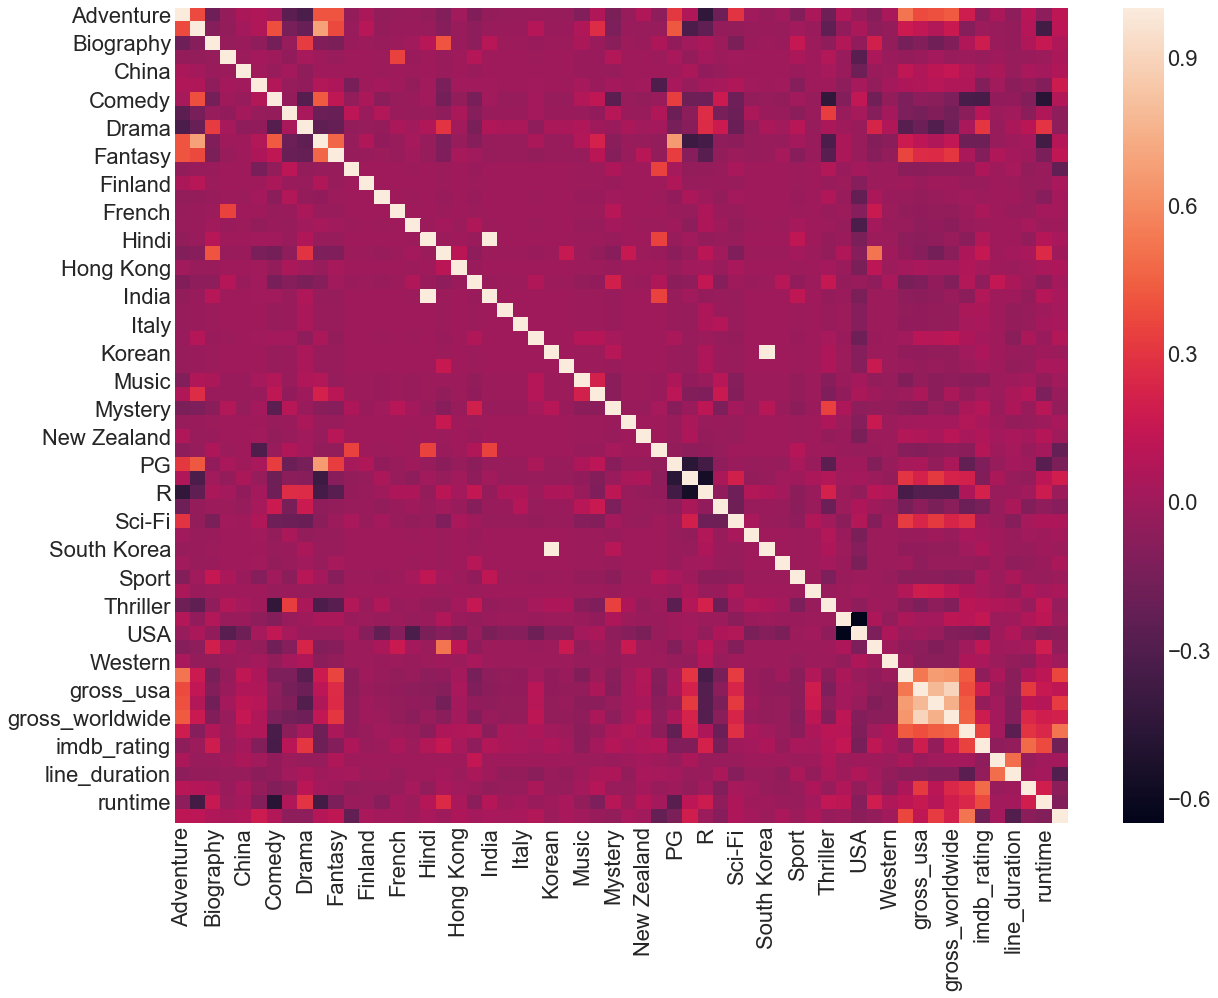

In [7]:
plt.rcParams.update({'font.size': 22})
plt.subplots(figsize=(20,15))
sns.heatmap(df_submov_bytitle.corr())

> # Generate pairplot (optional

In [10]:
import seaborn as sns
df_submov_bytitle = df_submov_bytitle[df_submov_bytitle.columns.difference(['metacritic_rating'])]
sns.set(font_scale=2)
df_submov_bytitle = df_submov_bytitle.reset_index()

# sns.pairplot(df_submov_bytitle[df_submov_bytitle['year'] > 1950],size = 4)
# df_submov_bytitle

# Fix categoricals

In [9]:
#df_submov_bytitle[df_submov_bytitle['title'].str.contains('xXx')]
df_submov_bytitle['SciFi'] = df_submov_bytitle['Sci-Fi']
df_submov_bytitle['FilmNoir'] = df_submov_bytitle['Film-Noir']
df_submov_bytitle['PG13'] = df_submov_bytitle['PG-13']
df_submov_bytitle['NotRated'] = df_submov_bytitle['Not Rated']
df_submov_bytitle['HongKong'] = df_submov_bytitle['Hong Kong']
df_submov_bytitle['SouthKorea'] = df_submov_bytitle['South Korea']
df_submov_bytitle['SouthAfrica'] = df_submov_bytitle['South Africa']
df_submov_bytitle['NewZealand'] = df_submov_bytitle['New Zealand']
df_submov_bytitle =df_submov_bytitle.drop(['Sci-Fi','Film-Noir','PG-13','Not Rated','South Africa','South Korea','Hong Kong','New Zealand'],axis=1) 

In [ ]:
df_submov_bytitle.to_pickle('../data/df_submove_bytitle-2018-04-25-0351.pkl')

# Generate linear model
Using sklearn for modle and statsmodels for ols 

# LOAD PICKLE

## Define Patsy Coefs

In [74]:
# Formula variables
countries_formula = "+Canada+China+Finland+France+Germany+HongKong+India+Ireland+Italy+Japan+Netherlands+NewZealand+SouthAfrica+SouthKorea+Spain+UK+USA+Malta"
language_formula = "+French+Hindi+Korean+Swahili"
imdb_formula = "year + budget+gross_usa + gross_usa_weekend + gross_worldwide + imdb_rating+imdb_critic_reviews_total + runtime"
genre_formula  = "+Adventure+Animation+Biography+Color+Comedy+Crime+Drama+Family+Fantasy+FilmNoir+History+Horror+Music+Musical+Mystery+Romance+SciFi+Sport+Thriller+War+Western"
ratings_formula = "+R+PG13+NotRated"

''' Countries not helping'''
#regression_formula = imdb_formula + genre_formula + ratings_formula + countries_formula + language_formula
#regression_formula = imdb_formula + genre_formula + ratings_formula + language_formula
#regression_formula = imdb_formula + genre_formula + ratings_formula
regression_formula = imdb_formula + genre_formula 

# Define Patsy Interactions

In [ ]:
# Formula variables
countries_formula = "Canada+China+Finland+France+Germany+HongKong+India+Ireland+Italy+Japan+Netherlands+NewZealand+SouthAfrica+SouthKorea+Spain+UK+USA+Malta"
language_formula = "French+Hindi+Korean+Swahili"
imdb_formula = "year + budget+gross_usa + gross_usa_weekend + gross_worldwide + imdb_rating+imdb_critic_reviews_total + runtime+"
genre_formula  = "Adventure+Animation+Biography+Color+Comedy+Crime+Drama+Family+Fantasy+FilmNoir+History+Horror+Music+Musical+Mystery+Romance+SciFi+Sport+Thriller+War+Western"
interactions = "("+ countries_formula+"):("+"language_formula"+"):("+genre_formula+"):("+ratings_formula+")"
ratings_formula = "R+PG13+NotRated"

regression_formula = imdb_formula + interactions

# Model with patsy

In [75]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [53]:
b = df_submov_bytitle.reset_index()
b[b['title'] == "Vertigo"]

Empty DataFrame
Columns: [title, Adventure, Animation, Biography, Canada, China, Color, Comedy, Crime, Drama, Family, Fantasy, Finland, France, French, Germany, Hindi, History, Horror, India, Ireland, Italy, Japan, Korean, Malta, Music, Musical, Mystery, Netherlands, PG, R, Romance, Spain, Sport, Swahili, Thriller, UK, USA, War, Western, budget, gross_usa, gross_usa_weekend, gross_worldwide, imdb_critic_reviews_total, imdb_rating, line_delta, line_duration, metacritic_rating, runtime, year, SciFi, FilmNoir, PG13, NotRated, HongKong, SouthKorea, SouthAfrica, NewZealand]
Index: []

[0 rows x 59 columns]

In [76]:
# Filter and scale data
from sklearn import preprocessing, linear_model, pipeline
from sklearn.preprocessing import StandardScaler

# Filter data

df_submov_bytitle = df_submov_bytitle[(df_submov_bytitle['year'] > 1980)  & 
                         (df_submov_bytitle['line_duration'] <8000)]


#df_submov_bytitle
scalar = StandardScaler()
#df_submov_bytitle = df_submov_bytitle.drop('title',axis=1)

df_scaled = scalar.fit_transform(df_submov_bytitle)
df_scaled = pd.DataFrame(df_scaled,columns=df_submov_bytitle.columns)
df_scaled

# Create patsy matrix 
#y, X = patsy.dmatrices("line_duration ~"+regression_formula, data=df_scaled, return_type="dataframe")
y, X = patsy.dmatrices("line_duration ~"+regression_formula, data=df_submov_bytitle, return_type="dataframe")

lr = LinearRegression()
lr.fit(X,y)
score = lr.score(X,y)

predict = lr.predict(X.iloc[768].reshape(1, -1))
actual  = df_submov_bytitle.iloc[768]['line_duration']
df_submov_bytitle.iloc[768]
print(f'score={score}, predict={predict}, actual={actual}')

# Plot
# fig = sm.graphics.plot_regress_exog(model, "year", fig=fig)



score=0.20265619710363658, predict=[[2193.52809218]], actual=1911.893111638955


/Users/justinblinder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [55]:
#X.iloc[1]
df_submov_bytitle.iloc[0]

Adventure         1.0
Animation         0.0
Biography         0.0
Canada            0.0
China             0.0
Color             1.0
Comedy            1.0
Crime             1.0
Drama             0.0
Family            1.0
                ...  
runtime         103.0
year           1996.0
SciFi             0.0
FilmNoir          0.0
PG13              0.0
NotRated          0.0
HongKong          0.0
SouthKorea        0.0
SouthAfrica       0.0
NewZealand        0.0
Name: 101 Dalmatians, Length: 58, dtype: float64

In [56]:
df_submov_bytitle.iloc[1]

Adventure         0.0
Animation         0.0
Biography         1.0
Canada            0.0
China             0.0
Color             1.0
Comedy            0.0
Crime             0.0
Drama             1.0
Family            0.0
                ...  
runtime         134.0
year           2013.0
SciFi             0.0
FilmNoir          0.0
PG13              0.0
NotRated          0.0
HongKong          0.0
SouthKorea        0.0
SouthAfrica       0.0
NewZealand        0.0
Name: 12 Years a Slave, Length: 58, dtype: float64

# Model with Statsmodels 
* Test train split
* Then fit model with train
* Then predict with test

# NEW ROUTE START

#### Perform Test Train Split

In [116]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


''' Setup Data'''
# Filter data
df_r = df_submov_bytitle
df_r = df_r[(df_r['line_duration'] <  6000)]
df_r = df_r.reset_index()
df_r = df_r.drop('title',axis=1)
df_r = df_r[(df_r['year'] > 1950)]  

# Create an empty model
lr = LinearRegression()

# Choose predictor variables
X = df_r.loc[:, df_r.columns != 'line_duration']
# Choose response variable(s)
y = df_r['line_duration']

''' Test Train Split'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr_split = LinearRegression(fit_intercept=True)
lr_split.fit(X_train, y_train)

train_score = lr_split.score(X_train,y_train)
test_score = lr_split.score(X_test,y_test)

''' Now predict'''
#y_test = combined = y_test.append(X_test)
lr_split.predict(X.iloc[0].reshape(1, -1))
print(f'train: {train_score}, test:{test_score}')

X.iloc[0]
df_r.iloc[0]

train: 0.23019810874400862, test:0.14040285907268024


/Users/justinblinder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Adventure         1.0
Animation         0.0
Biography         0.0
Canada            0.0
China             0.0
Color             1.0
Comedy            1.0
Crime             1.0
Drama             0.0
Family            1.0
                ...  
runtime         103.0
year           1996.0
SciFi             0.0
FilmNoir          0.0
PG13              0.0
NotRated          0.0
HongKong          0.0
SouthKorea        0.0
SouthAfrica       0.0
NewZealand        0.0
Name: 0, Length: 58, dtype: float64

/Users/justinblinder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


score=0.20265619710363658, predict=[2159.95916804], actual=1911.893111638955


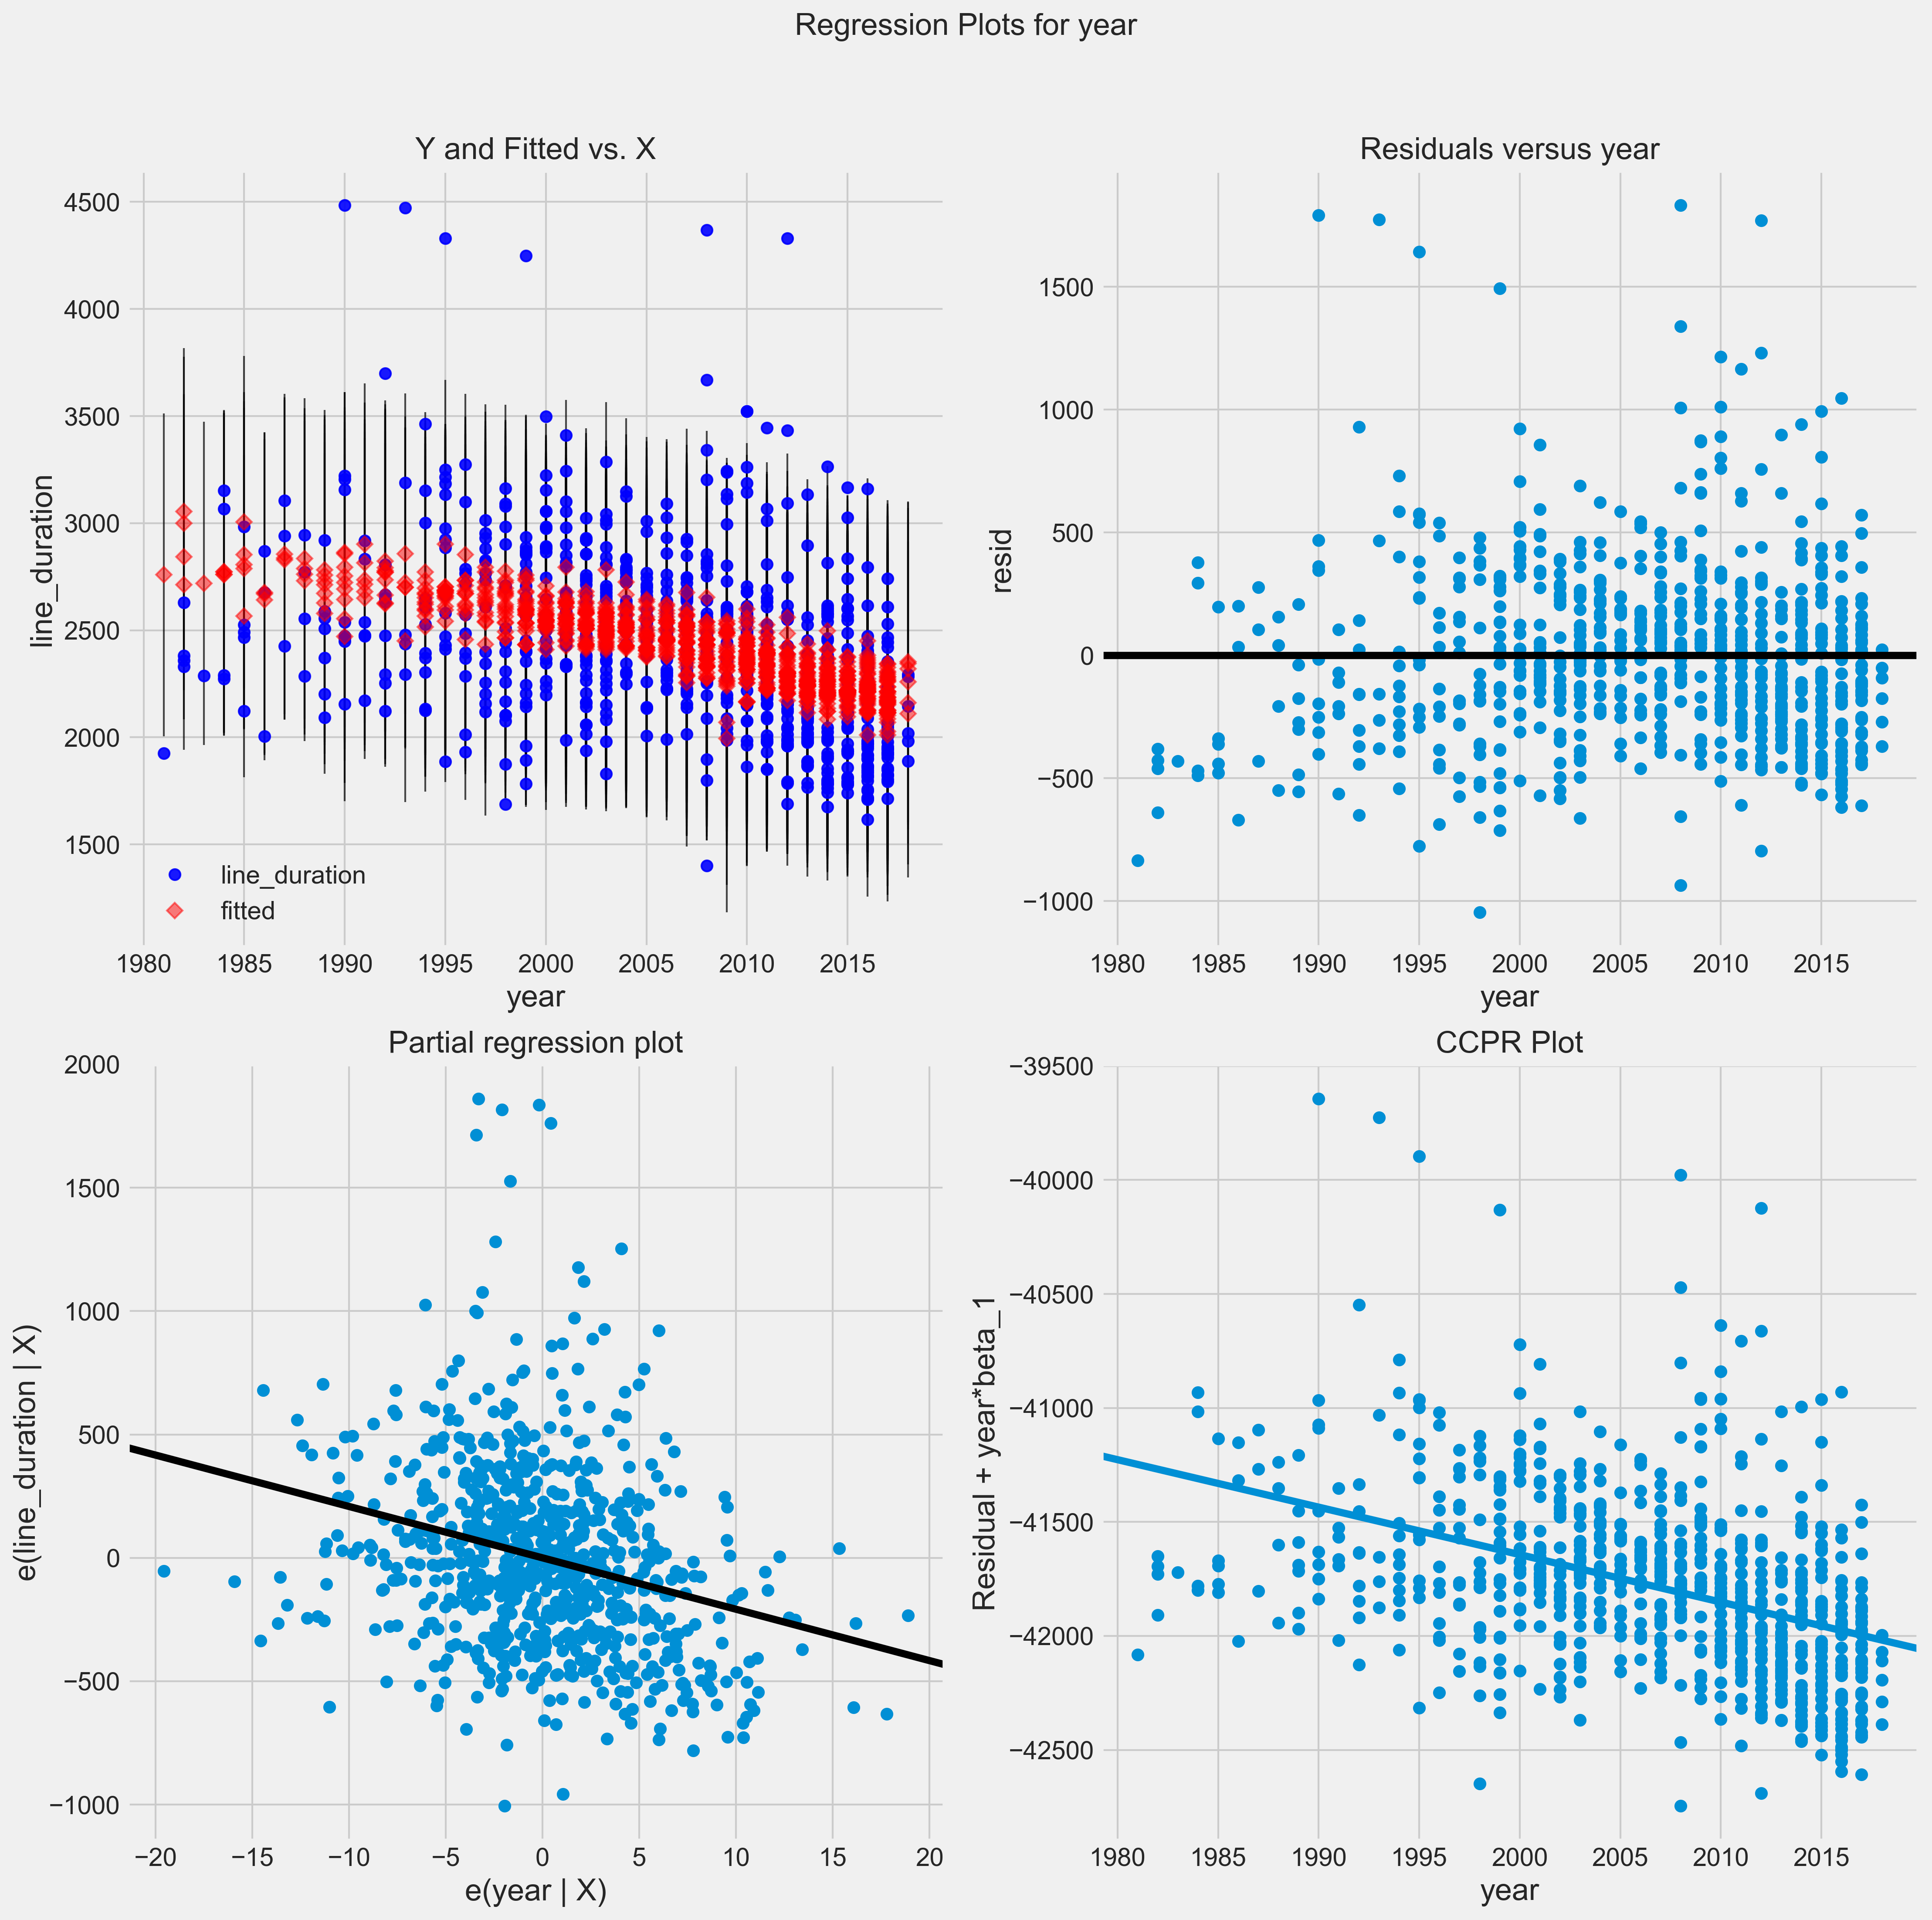

In [91]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8
rcParams['figure.dpi'] = 300
plt.style.use('fivethirtyeight')

# Create an empty model
lr = LinearRegression()

# Fit the model to the full dataset
lr.fit(X_train,y_train)

model = ols("line_duration ~"+ regression_formula, data=df_r).fit()
fig = plt.figure(figsize=(15,15))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(model, "year", fig=fig)
lr.score(X_test,y_test)

predict = lr.predict(X.iloc[768].reshape(1, -1))
actual  = df_r.iloc[768]['line_duration']
df_r.iloc[768]

print(f'score={score}, predict={predict}, actual={actual}')
#print( df_r[ df_r['title'] == "Batman"] )
#test = df_submov_bytitle

# NEW ROUTE END

In [85]:
#X = df_submov_bytitle.loc[:, df_submov_bytitle.columns != 'line_duration'] # 
#y = df_submov_bytitle['line_duration'] # Choose the response variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test

lr_split = LinearRegression(fit_intercept=True)
lr_split.fit(X_train, y_train)
train_score = lr_split.score(X_train,y_train)
test_score = lr_split.score(X_test,y_test)
print(f'train: {train_score}, test:{test_score}')


train: 0.22837727971526334, test:0.16899617442043036


In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
k_folds = KFold(n_splits=20, shuffle=True)

# 10-fold cross-validation with our fake data
reg = linear_model.LinearRegression()
scores = cross_val_score(reg, X, y, cv=k_folds, scoring='r2')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(-scores)

y_pred = cross_val_predict(reg, X, y, cv=k_folds)

np.mean(-scores)


[-0.19141735 -0.19165765 -0.22041469 -0.09367988  0.06321388  0.21768674
 -0.2592939  -0.12625709 -0.07173618 -0.23564263 -0.19865627 -0.17557809
 -0.09174241 -0.21680567 -0.16213045 -0.01967677 -0.00849837  0.19108887
 -0.32145596 -0.04391434]


-0.10782841004867691

### Create model 1970+ with Sklearn and statsmodels

/Users/justinblinder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


score=0.20265619710363658, predict=[2219.98056213], actual=1911.893111638955


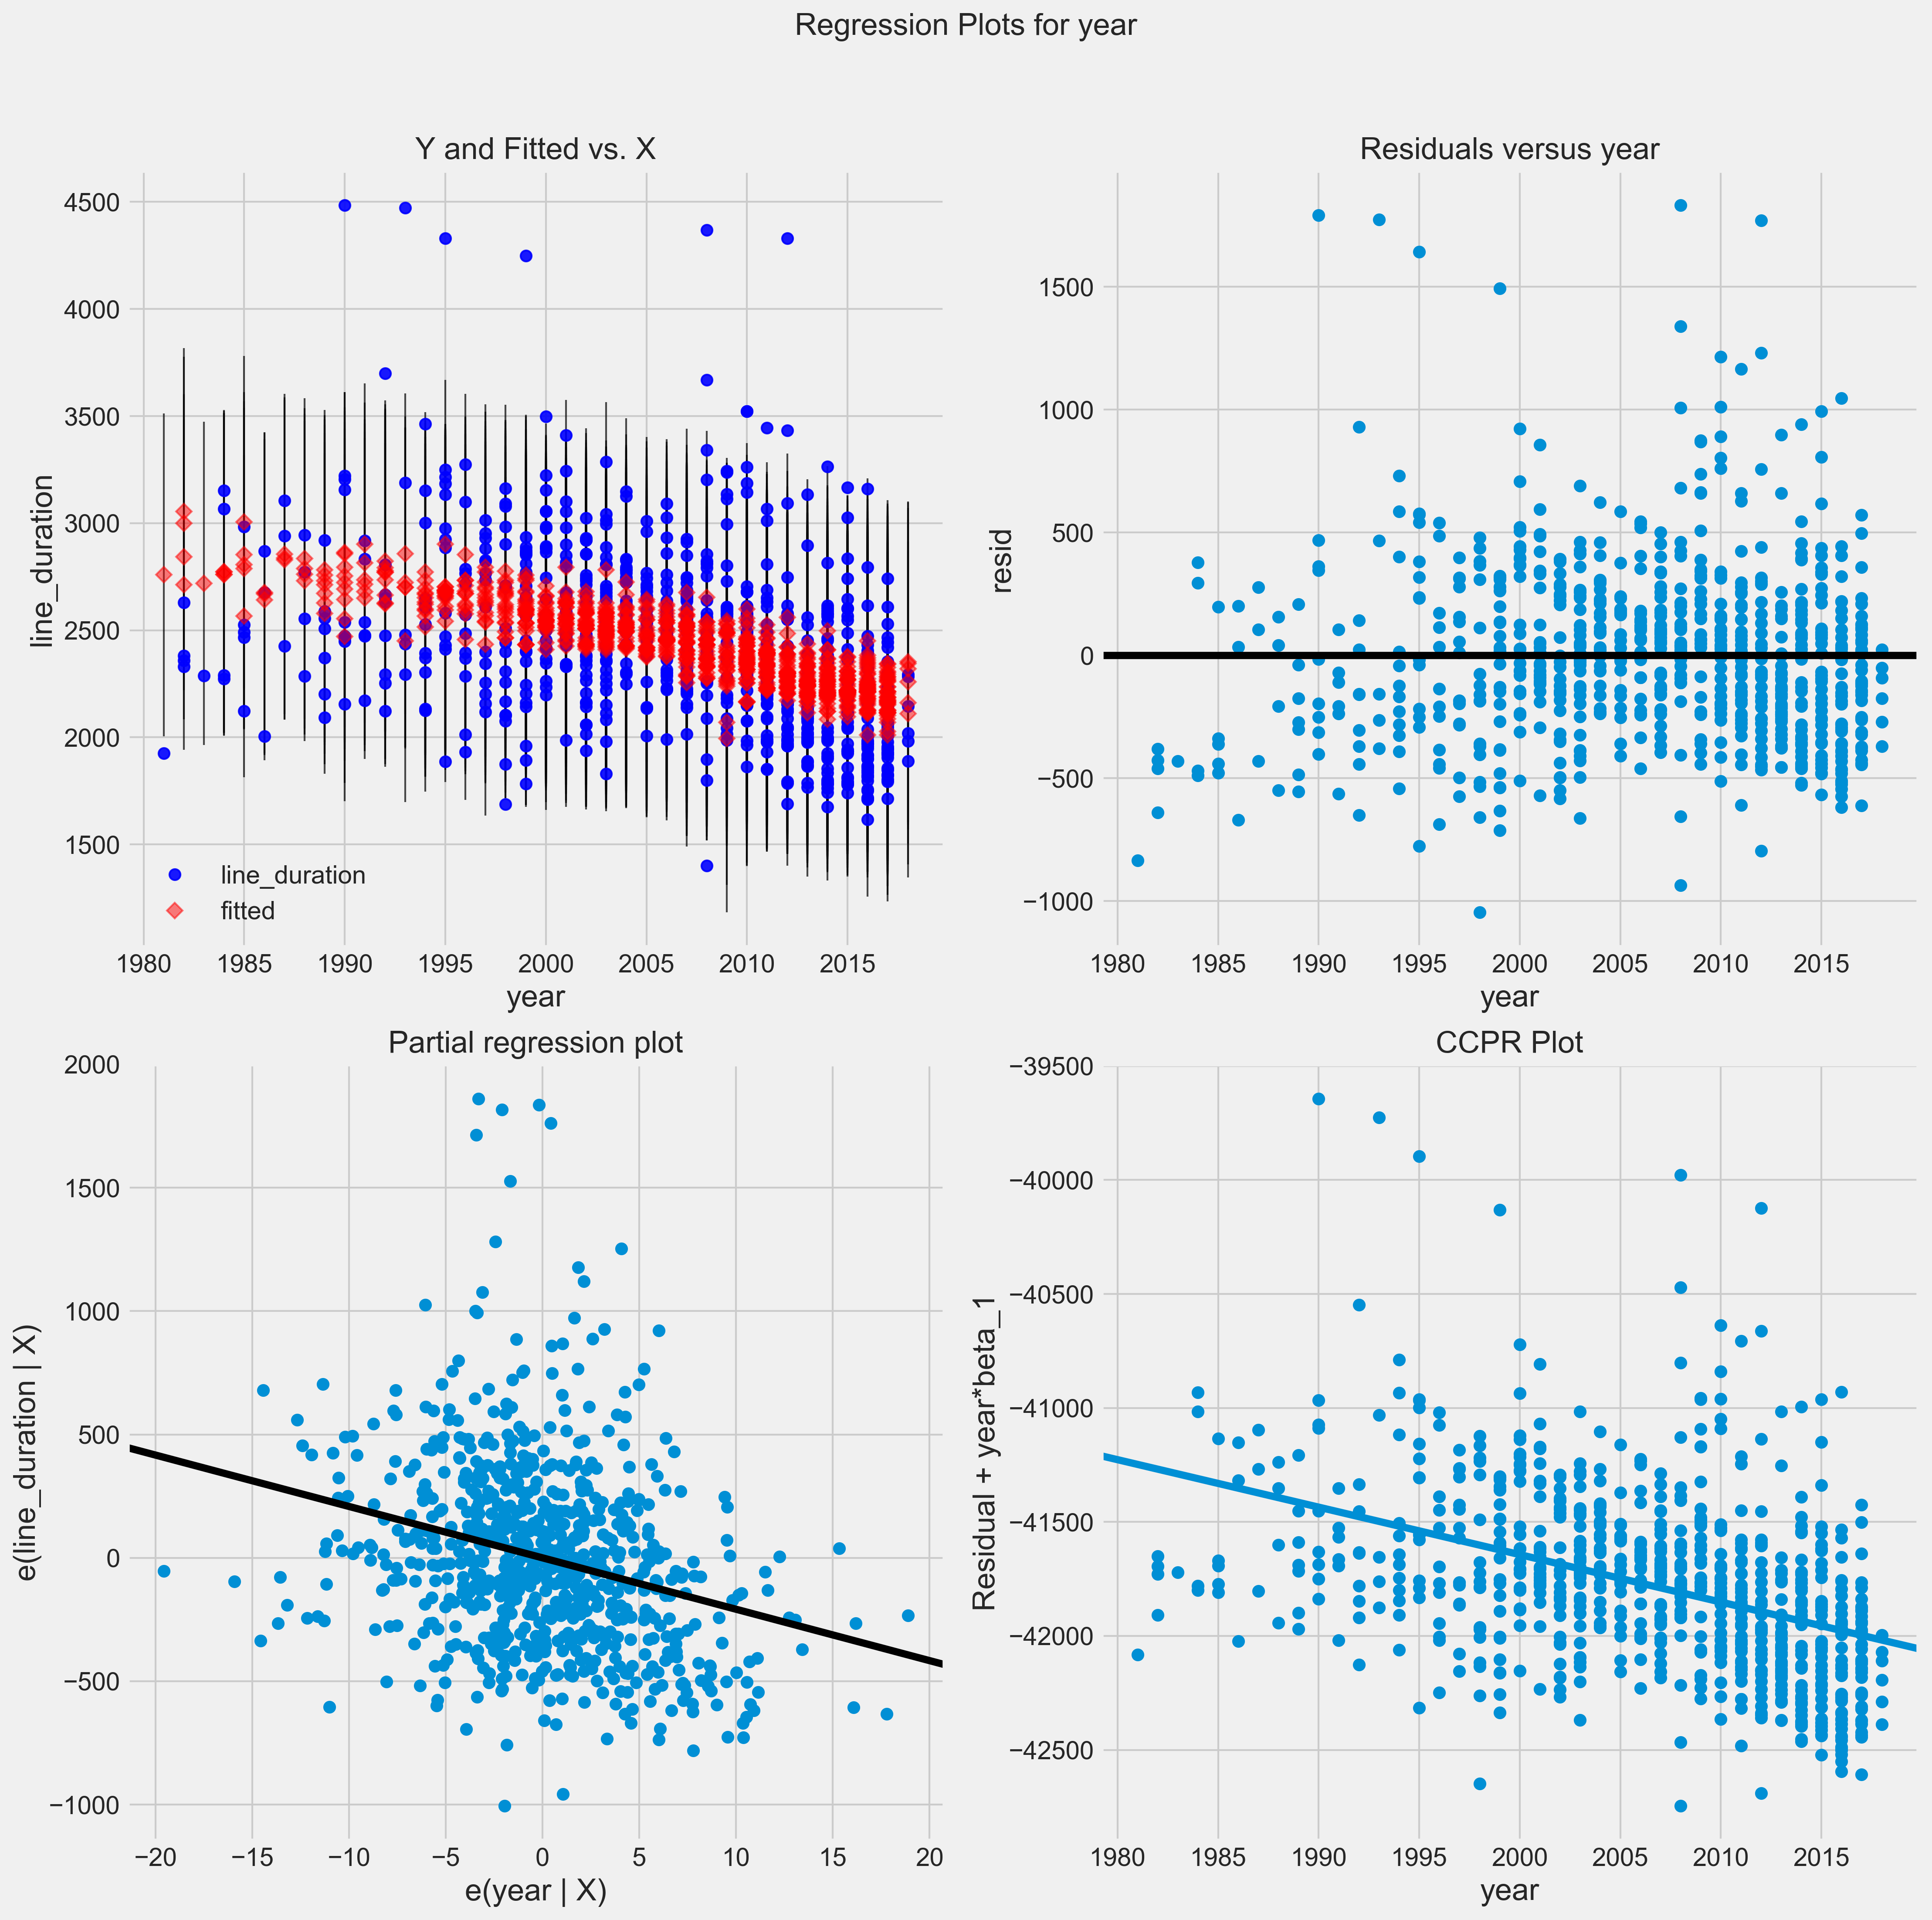

In [80]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8
rcParams['figure.dpi'] = 300
plt.style.use('fivethirtyeight')
df_r = df_submov_bytitle
df_r = df_r[(df_r['line_duration'] <  6000)]

# Create an empty model
lr = LinearRegression()
df_r = df_r.reset_index()
df_r = df_r.drop('title',axis=1)
df_r = df_r[(df_r['year'] > 1950)]  
#df_r = df_r[df_r.columns.difference(['line_delta'])]  
# Choose predictor variables
X = df_r.loc[:, df_r.columns != 'line_duration']

# Choose response variable(s)
y = df_r['line_duration']

# Fit the model to the full dataset
lr.fit(X,y)

model = ols("line_duration ~"+ regression_formula, data=df_r).fit()
fig = plt.figure(figsize=(15,15))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(model, "year", fig=fig)
lr.score(X,y)

predict = lr.predict(X.iloc[768].reshape(1, -1))
actual  = df_r.iloc[768]['line_duration']
df_r.iloc[768]
print(f'score={score}, predict={predict}, actual={actual}')
#print( df_r[ df_r['title'] == "Batman"] )
#test = df_submov_bytitle

### Create model 1930+ with Sklearn and statsmodels

/Users/justinblinder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


score=0.20265619710363658, predict=[2219.98056213], actual=1911.893111638955


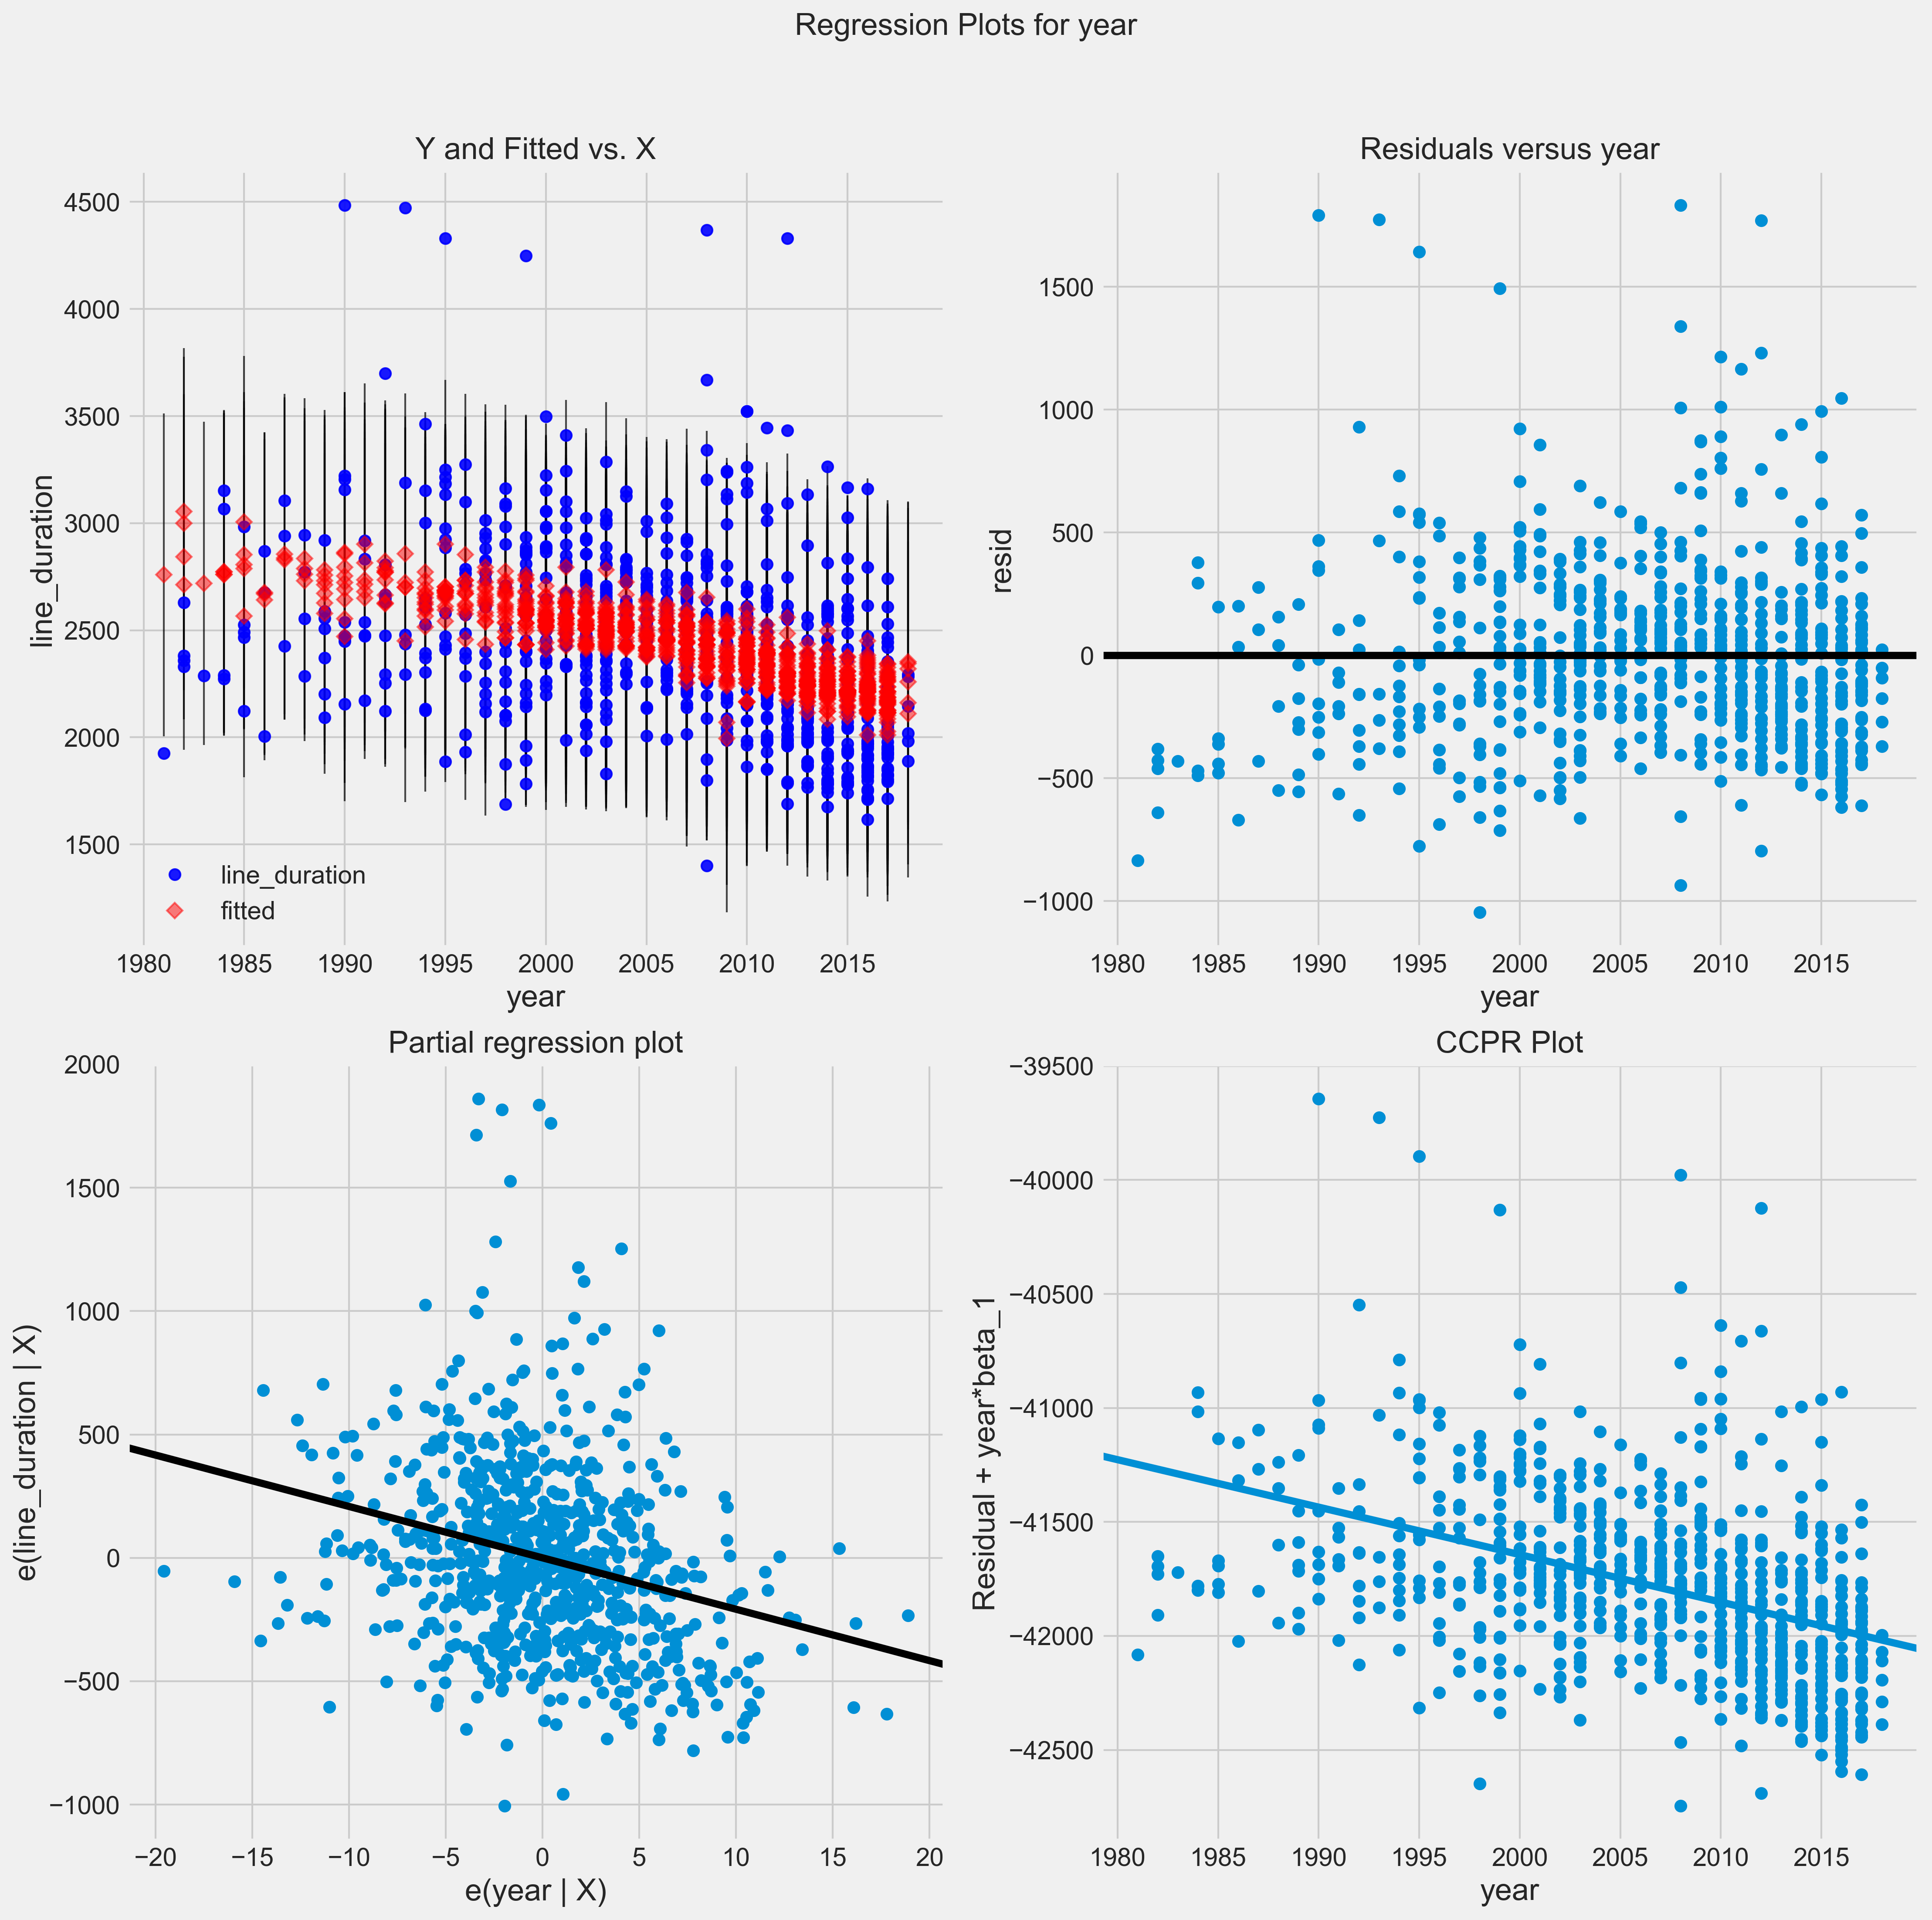

In [70]:
df_r = df_submov_bytitle

# Create an empty model
lr = LinearRegression()
df_r = df_r.reset_index()
df_r = df_r.drop('title',axis=1)
df_r = df_r[(df_r['year'] > 1930)]  
# Choose predictor variables
X = df_r.loc[:, df_r.columns != 'line_duration']

# Choose response variable(s)
y = df_r['line_duration']

# Fit the model to the full dataset
lr.fit(X,y)

model = ols("line_duration ~"+ regression_formula, data=df_r).fit()
fig = plt.figure(figsize=(15,15))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(model, "year", fig=fig)
lr.score(X,y)


predict = lr.predict(X.iloc[768].reshape(1, -1))
actual  = df_r.iloc[768]['line_duration']
df_r.iloc[768]
print(f'score={score}, predict={predict}, actual={actual}')



# Lasso

/Users/justinblinder/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


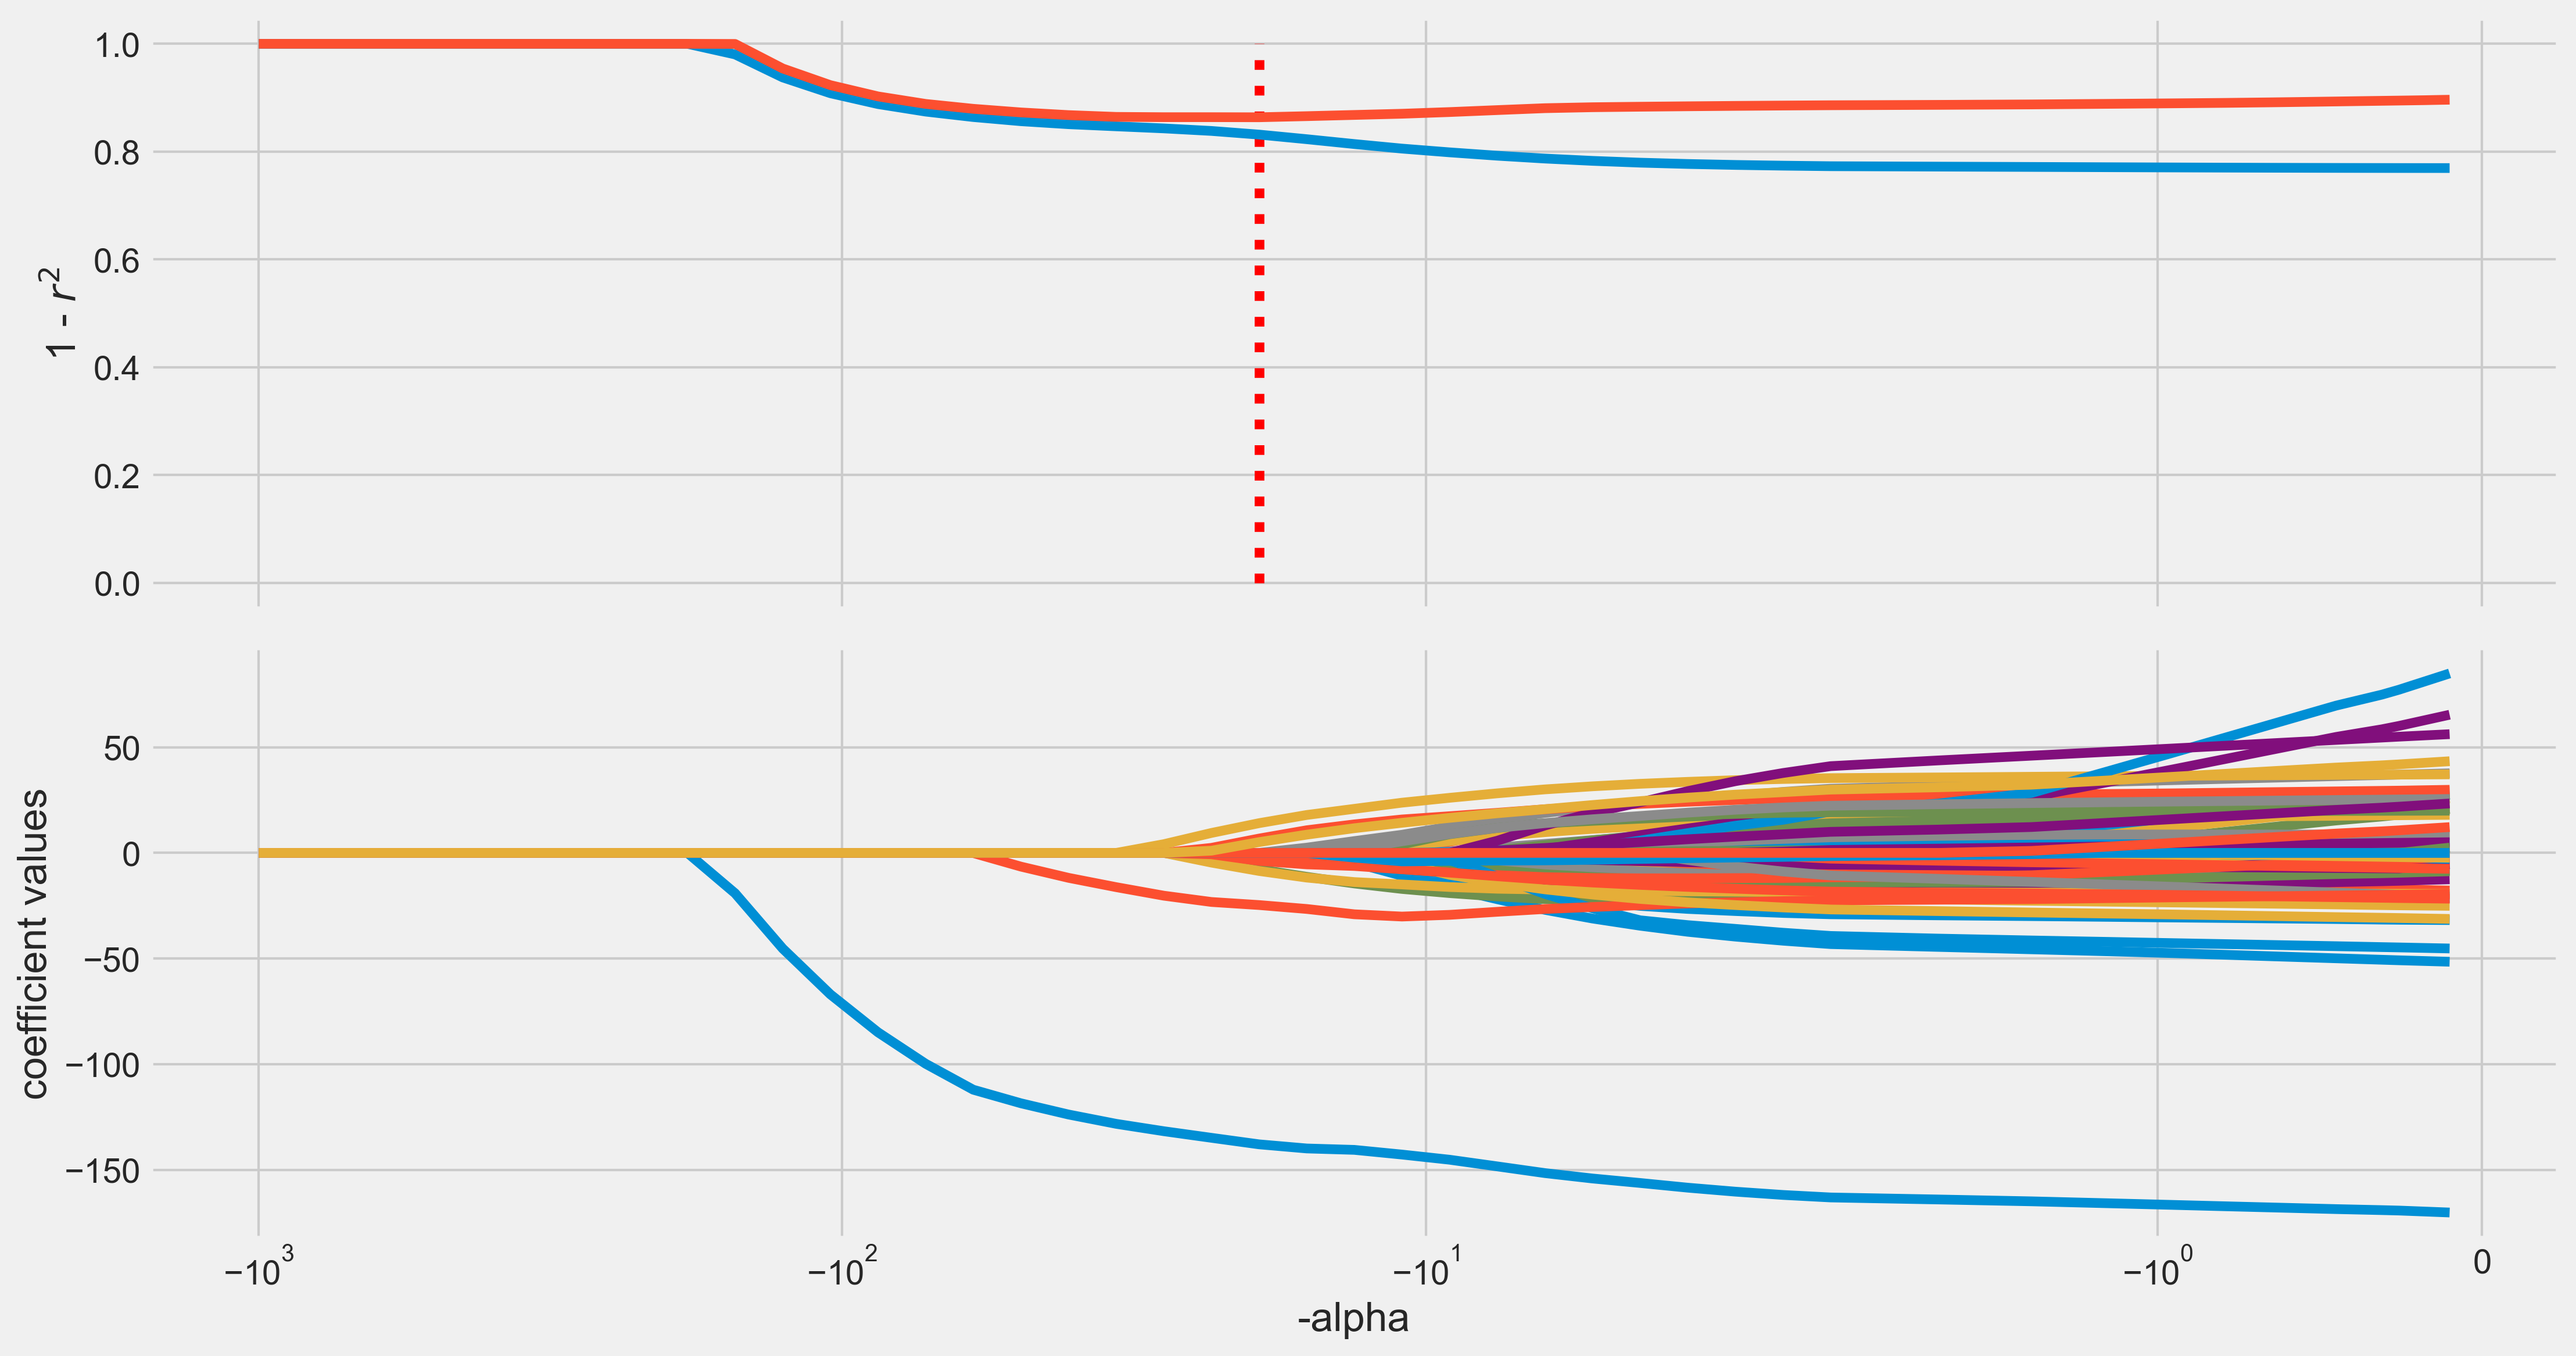

In [82]:
from sklearn.model_selection import cross_validate

lasso_pipe = pipeline.Pipeline([
    ("imp", preprocessing.Imputer()), 
    ("std", preprocessing.StandardScaler()),
    ("lasso", linear_model.Lasso())
])
fig, axes = plt.subplots(2,1, figsize=(15, 8), sharex=True, tight_layout=True)

# start lower -- .1
alphas = np.logspace(-1,3, num=50)
coefs = []
train_scores = []
test_scores = []
# fig, axes = plt.subplots(1,len(alphas), figsize=(20, 8), sharey=True)
for i, alpha in enumerate(alphas):
    lasso_pipe.set_params(lasso__alpha=alpha)
    cv_result = cross_validate(lasso_pipe, X=X, y=y, cv=10, return_train_score=True)
    train_scores.append(np.maximum(np.mean(cv_result['train_score']), 0))
    test_scores.append(np.maximum(np.mean(cv_result['test_score']), 0))
    lasso_pipe.fit(X_train, y_train)
    coefs.append(lasso_pipe.named_steps["lasso"].coef_)
    

coefs = np.squeeze(coefs, axis=1)
ax0 = axes.flat[0]
ax0.plot(-alphas, 1 - np.array(train_scores), label="train")
ax0.plot(-alphas, 1 - np.maximum(test_scores, 0), label="test")
best_i = np.argmax(test_scores)
ax0.vlines(-alphas[best_i], 0,1, colors="red", linestyles="dotted")
ax0.set_ylabel("1 - $r^2$")
ax1 = axes.flat[1]
ax1.plot(-alphas,coefs)
ax1.set_ylabel("coefficient values")
ax1.set_xlabel("-alpha")
ax1.set_xscale("symlog")
plt.xscale("symlog")
# plt.yscale("symlog")

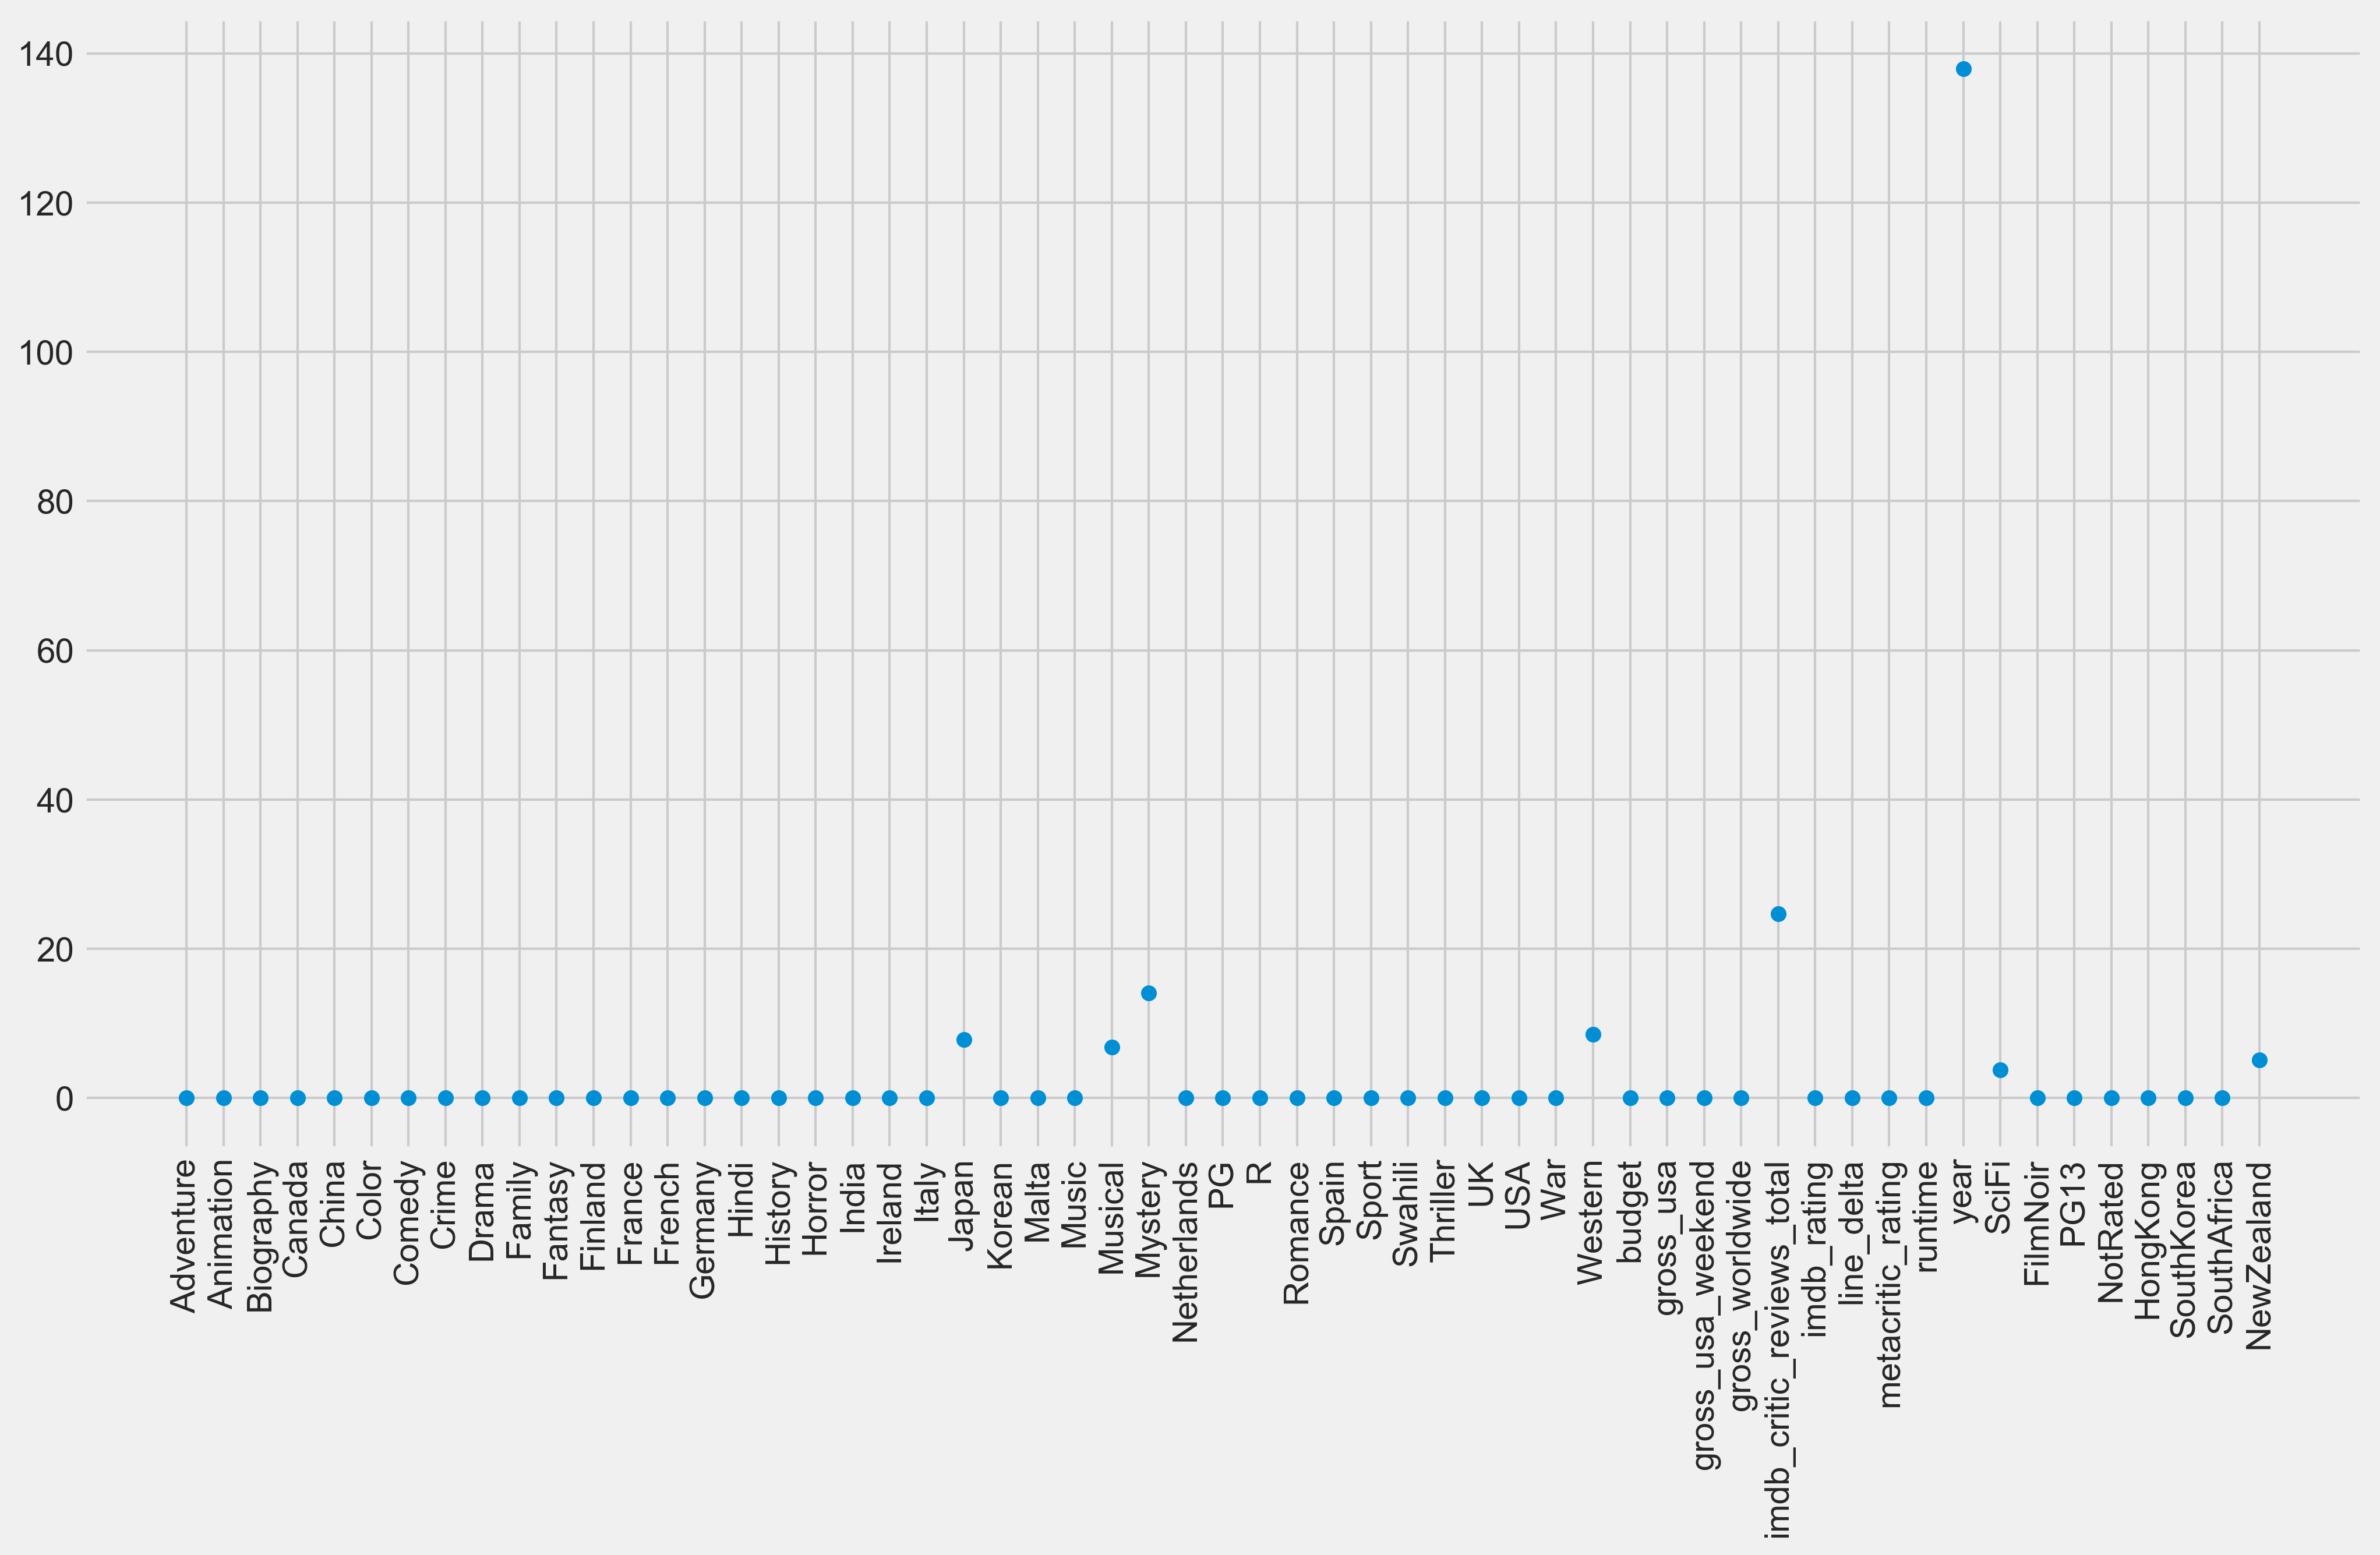

In [83]:
from matplotlib import rcParams


plt.style.use('fivethirtyeight')

rcParams['figure.figsize'] = 15,8
rcParams['figure.dpi'] = 300
#rcParams['figure.fontSize'] = 300

best_c = coefs[best_i,:]
plt.scatter(np.arange(len(best_c)), np.abs(best_c))
#plt.scatter(np.arange(len(best_c)), best_c) # shows oppositie correlations -- useful for presentation

# plt.yscale("symlog")
plt.xticks(np.arange(len(best_c)), X.columns, rotation=90);
# two columns with top x variables and create a new model with that 


# Visualize learning curve

In [73]:
from sklearn.metrics import mean_squared_error

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

n_pols = 11

colors = sns.hls_palette(2)

# Step through degrees from 0 to 9 and store the training and test (generalization) error.
train_error = np.empty(n_pols)
test_error = np.empty(n_pols)
mean_coef = np.empty(n_pols)
n_feat = np.empty(n_pols)
for degree in range(n_pols):

    est = pipeline.make_pipeline(
        preprocessing.PolynomialFeatures(degree),
        linear_model.LinearRegression())
    est.fit(X_train, y_train)

    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))

    mean_coef[degree] = mean(abs(est.get_params()['linearregression'].coef_))

# Plot the training and test errors against degree
fig, axes = subplots(nrows=2, ncols=1, squeeze=True, figsize=(6, 8))

axes[0].plot(np.arange(n_pols), train_error, label='train', color=colors[0])
axes[0].plot(np.arange(n_pols), test_error, label='test', color=colors[1])
# plt.ylim((0, n_pols))
axes[0].set_ylabel('log(mean squared error)')
axes[0].set_xlabel('complexity →')
axes[0].legend(loc='upper left')

axes[1].set_xlabel('degree')
axes[1].set_ylabel('mean(abs(coefficients))')
axes[1].semilogy(np.arange(n_pols), mean_coef)

plt.savefig("complexity.pdf")

NameError: name 'mean' is not defined

ValueError: x and y must be the same size

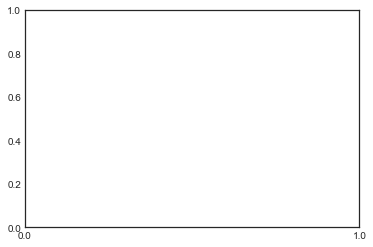

In [34]:
#x_values=X_test['year'].values[:,np.newaxis]
#y_values=y_test['line_duration'].values[:,np.newaxis]
plt.scatter(X_test, y_test)
plt.plot(np.sort(X_test, axis=0),prediction)
plt.show()

In [35]:
# same as above, just using more straightforward OLS method from statsmodels
model = sm.OLS(y,X)
results = model.fit()
results.summary()
#fig = sm.graphics.plot_regress_exog(results, "year", fig=fig)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          line_duration   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     580.3
Date:                Wed, 25 Apr 2018   Prob (F-statistic):               0.00
Time:                        14:02:13   Log-Likelihood:                -5771.9
No. Observations:                 786   AIC:                         1.165e+04
Df Residuals:                     732   BIC:                         1.190e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Adventure                   -90.1709     42.751     -2.109      0.035    -174.100      -6.242
Animation                   -53.0772     66.452     -0.799      0.425    -183.536      77.381
Biography                  -136.2315     72.072     -1.890      0.059    -277.723       5.260
Canada                       65.2349    232.413      0.281      0.779    -391.041     521.510
China                       254.8813    290.495      0.877      0.381    -315.421     825.184
Color                       -13.9026     94.391     -0.147      0.883    -199.212     171.406
Comedy                      -70.1515     46.396     -1.512      0.131    -161.237      20.935
Crime                       -33.6141     45.227     -0.743      0.458    -122.403      55.175
Drama                        17.2653     38.278      0.451      0.652     -57.881      92.412
Family                      -21.2817     67.652     -0.315      0.753    -154.096     111.533
Fantasy                      29.7957     42.893      0.695      0.487     -54.412     114.003
Finland                     309.3358    429.207      0.721      0.471    -533.287    1151.959
France                      201.7867    239.363      0.843      0.399    -268.132     671.706
French                     -290.1283    429.090     -0.676      0.499   -1132.522     552.266
Germany                     163.7202    209.327      0.782      0.434    -247.232     574.672
Hindi                       113.0882    216.791      0.522      0.602    -312.519     538.695
History                     129.8914     86.949      1.494      0.136     -40.808     300.591
Horror                      -61.1518     70.693     -0.865      0.387    -199.937      77.633
India                       113.0883    216.791      0.522      0.602    -312.519     538.695
Ireland                    -183.9398    429.412     -0.428      0.669   -1026.966     659.087
Italy                      -291.5507    431.309     -0.676      0.499   -1138.301     555.199
Japan                      -186.8243    267.403     -0.699      0.485    -711.793     338.144
Korean                     -103.3653    214.876     -0.481      0.631    -525.211     318.481
Malta                      -458.3277    436.350     -1.050      0.294   -1314.975     398.319
Music                       -28.7465     83.813     -0.343      0.732    -193.290     135.797
Musical                     153.0411     87.858      1.742      0.082     -19.442     325.524
Mystery                      81.6256     48.064      1.698      0.090     -12.734     175.985
Netherlands                -355.1748    440.220     -0.807      0.420   -1219.419     509.069
PG                          -80.0108     78.705     -1.017      0.310    -234.526      74.504
R                          -144.4722    101.397     -1.425      0.155    -3

In [ ]:
lsm = smf.ols('line_duration ~ year', data = df_r)
fit1 = lsm.fit()
fit1.summary()


In [197]:
class Voter(object):
    def __init__(self,loadfile):
        self.loadfile = loadfile
        
    def data_clean(self, df):
        str_cols = ['female 30-44','v_female 30-44','female <18','v_female <18','male <18','v_male <18']    # replae '-'
        df[str_cols] = df[str_cols].replace('-', '', regex=True)  
        str_cols = ['r'+str(i) for i in range(1,11)]
        str_cols.append('votes')
        df[str_cols] = df[str_cols].replace(',', '', regex=True)  
        df = df.apply(pd.to_numeric, errors=0)
        return df
    
    def run(self):
        df = pd.read_json(self.loadfile)
        df = self.data_clean(df)
        return df
v = Voter('../data/oscar_voter.json')

In [200]:
v.run()

female 18-29  female 30-44  female 45+  female <18  female all  \
0             6.3           6.5         6.9         5.0         6.7   
1             7.9           7.8         7.8         8.0         7.9   
2             7.9           7.7         8.4         9.0         8.1   
3             7.3           7.6         8.3         5.0         7.9   
4             7.1           7.2         7.4         8.0         7.3   
5             7.3           7.3         7.7         NaN         7.5   
6             7.7           7.7         7.9         8.0         7.7   
7             7.3           7.5         8.1         8.2         7.6   
8             7.0           6.8         6.8         8.2         6.9   
9             6.6           7.6         7.8         NaN         7.6   
..            ...           ...         ...         ...         ...   
529           7.4           7.3         7.8         NaN         7.5   
530           7.7           7.5         7.5         8.0         7.6   
531           8.5           8.1         8.0         8.7         8.3   
532           8.3           8.1         7.6         8.4         8.2   
533           6.6           6.8         6.7         8.0         6.7   
534           7.8           7.5         7.6         7.7         7.6   
535           6.6           7.2         7.1         7.0         7.1   
536           7.0           7.0         7.4         9.0         7.1   
537           8.9           8.8         8.8         9.0         8.8   
538           8.2           8.0         8.1         8.5         8.1   

     male 18-29  male 30-44  male 45+  male <18  male all  non_us_rating  \
0           6.7         6.5       6.7       8.5       6.6            6.5   
1           7.7         7.8       7.8       NaN       7.8            7.8   
2           8.0         7.6       7.8       NaN       7.8            7.8   
3           7.7         7.7       8.1       7.6       7.8            7.7   
4           6.9         6.7       7.0       9.0       6.9            6.9   
5           7.6         7.2       7.4       6.3       7.4            7.4   
6           7.9         7.7       7.9       8.2       7.8            7.7   
7           7.2         7.0       7.5       8.1       7.2            7.2   
8           7.3         6.9       6.8       8.0       7.0            6.9   
9           7.3         7.0       7.3      10.0       7.2            6.9   
..          ...         ...       ...       ...       ...            ...   
529         7.4         7.4       7.4       NaN       7.4            7.3   
530         7.8         7.5       7.3       7.9       7.6            7.6   
531         8.4         8.1       7.8       8.5       8.2            8.2   
532         8.5         8.3       8.1       9.1       8.4            8.3   
533         6.5         6.3       6.7       NaN       6.5            6.5   
534         7.8         7.6       7.6       8.1       7.7            7.5   
535         7.0         6.6       7.1       NaN       7.0            6.8   
536         7.3         7.0       7.2       9.0       7.1            7.1   
537         9.1         8.9       8.7       9.3       9.0            8.9   
538         8.2         8.0       7.8       8.5       8.1            8.0   

        r1     r10    r2    r3    r4     r5     r6      r7      r8      r9  \
0      168    1015   164   318   622   1555   3370    4428    2305     844   
1       40     409    18    23    41    102    198     473     732     433   
2       50    1031    28    41    76    232    580    1453    2219    1291   
3      721    5707   237   243   369    873   1989    4601    7124    4444   
4       38     358    36    67   108    194    384     684     506     301   
5      206    1355   105   165   302    789   1806    4088    3964    1894   
6      139    2686    76   117   195    580   1446    3707    5205    2827   
7      387    5139   286   463   806   1681   4034    8187    8181    4458   
8     2495    8756  1508  2267  3859   8151  17147   30548   26327 

In [199]:
v